Exploring E-Commerce Reviews on Amazon using Bidirectional Recurrent Neural Network (RNN) and Long-Short Term Memory (LSTM) for Sentiment and Recommendation Analysis
===



In [1]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv('Amazon.csv',encoding= 'unicode_escape')

In [3]:
for column in ["Product Type","Primary Category","Category","Review Text"]:
    df = df[df[column].notnull()]
df.drop(df.columns[0], inplace=True, axis=1)

In [4]:
df.shape

(16086, 9)

In [5]:
df['Label'] = 0

In [6]:
df.loc[df.Rating >= 3, ['Label']] = 1

In [7]:
df['Word Count'] = df['Review Text'].str.split().apply(len)

In [8]:
df.sample(10)

ID                                    Title  \
1612   AVphPmHuilAPnD_x3E5h                             Great reader   
6792   AVpgdkC8ilAPnD_xsvyi  Great tablet for a child/early teenager   
5355   AVqVGWQDv8e3D1O-ldFr                                  Not bad   
3693   AVpfw2hvilAPnD_xh0rH                               Great Item   
10636  AVpjEN4jLJeJML43rpUe       purchased for outdoor living space   
774    AVpfpK8KLJeJML43BCuD                        A great assistant   
9088   AVqkIdZiv8e3D1O-leaJ                       All around great!!   
14807  AVqkIhxunnc1JgDc3kg_             Great price on a nice tablet   
2457   AVpfw2hvilAPnD_xh0rH          Excellent my grandson loves it!   
3694   AVqVGWQDv8e3D1O-ldFr                               Great Item   

                                             Review Text  Rating  \
1612   I purchased this for my son overseas as he had...       5   
6792   We have always been Nexus Tablet desciples, an...       5   
5355   Nice tablet for the price. Just wish it had bl...       3   
3693   My granddaugther constantly drops her tablet a...       5   
10636  Just installed, but like it so far. The pictur...       4   
774    It works well it takes time for it to know you...       5   
9088   Bought for my kids and they love them!! They l...       4   
14807  The Amazon Fire is a great tablet with awesome...       5   
2457   My Grandson uses it all the time. It was a gre...       5   
3694   Now all 5 of my children have a kindle. This o...       5   

       Recommended IND  Helpful Review Count  Product Type  \
1612                 1                     0      E-reader   
6792                 1                     0        Tablet   
5355                 1                     0        Tablet   
3693                 1                     0        Tablet   
10636                1                     0        Tablet   
774                  1                     0  Music System   
9088                 1                     0        Tablet   
14807                1                     0        Tablet   
2457                 1                     0        Tablet   
3694                 1                     0        Tablet   

               Primary Category  \
1612                Electronics   
6792                Electronics   
5355                Electronics   
3693   Toys & Games,Electronics   
10636               Electronics   
774                 Electronics   
9088                Electronics   
14807               Electronics   
2457   Toys & Games,Electronics   
3694                Electronics   

                                                Category  Label  Word Count  
1612   eBook Readers,Electronics Features,Walmart for...      1          65  
6792   Fire Tablets,Computers/Tablets & Networking,Ta...      1          56  
5355   Fire Tablets,Computers/Tablets & Networking,El...      1          10  
3693   Fire Tablets,Learning Toys,Toys,Tablets,Amazon...      1          12  
10636  Fire Tablets,Computers/Tablets & Networking,Ta...      1          16  
774    Amazon Echo,Home Theater & Audio,MP3 MP4 Playe...      1          12  
9088   Fire Tablets,Android Tablets,Tablets,All Table...      1          12  
14807  Fire Tablets,Tablets,All Tablets,Amazon Tablet...      1          25  
2457   Fire Tablets,Learning Toys,Toys,Tablets,Amazon...      1          12  
3694   Fire Tablets,Computers/Tablets & Networking,El...      1          17

In [9]:
df.describe().T.drop('count', axis=1)

mean        std  min   25%   50%   75%     max
Rating                 4.564342   0.748718  1.0   4.0   5.0   5.0     5.0
Recommended IND        0.954432   0.208552  0.0   1.0   1.0   1.0     1.0
Helpful Review Count   0.324568   3.059258  0.0   0.0   0.0   0.0   130.0
Label                  0.974015   0.159096  0.0   1.0   1.0   1.0     1.0
Word Count            30.422355  39.808293  1.0  14.0  20.0  35.0  1539.0

In [10]:
df[['Title', 'Product Type', 'Primary Category', 'Category']].describe(include=['O']).T.drop('count', axis=1)

unique                                                top  \
Title              5896                                       Great tablet   
Product Type          4                                             Tablet   
Primary Category      5                                        Electronics   
Category             30  Fire Tablets,Tablets,All Tablets,Amazon Tablet...   

                   freq  
Title               486  
Product Type      14396  
Primary Category  13837  
Category           2443

## Product Type and Primary Category Distributions

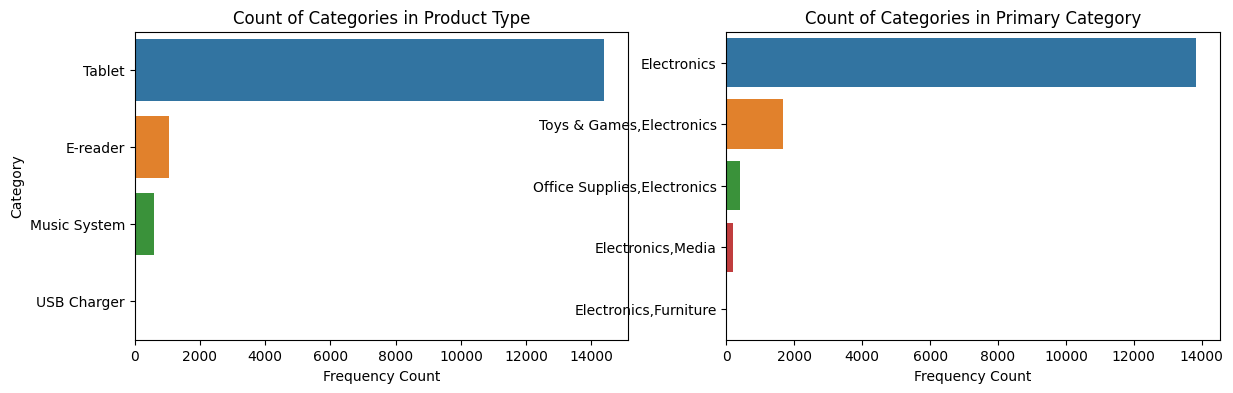

In [11]:
row_plots = ['Product Type', 'Primary Category']
f, axes = plt.subplots(1, len(row_plots), figsize=(14, 4), sharex=False)

for i, x in enumerate(row_plots):
    sns.countplot(y=x, data=df, order=df[x].value_counts().index, ax=axes[i])
    axes[i].set_title('Count of Categories in {}'.format(x))
    axes[i].set_xlabel('')
    axes[i].set_xlabel('Frequency Count')
axes[0].set_ylabel('Category')
axes[1].set_ylabel('')
plt.savefig('divname-and-deptname-freqdist.png', format='png', dpi=600)
plt.show()

## Frequency Distribution of Rating, Recommended IND, and Label

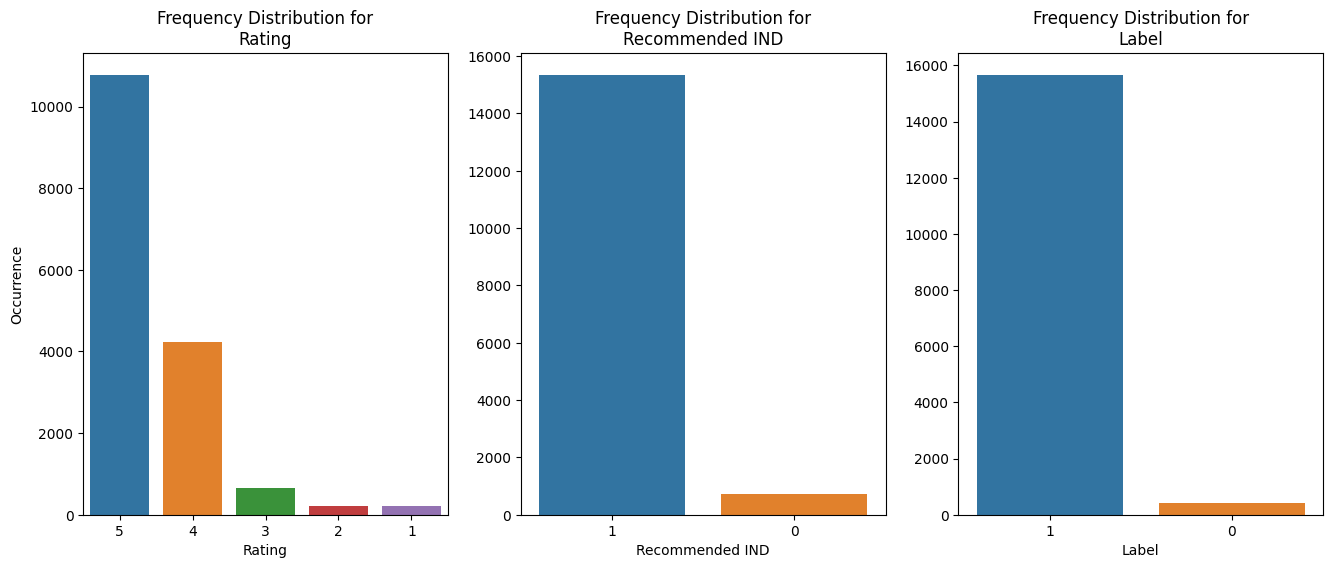

In [12]:
cat_dtypes = ['Rating', 'Recommended IND', 'Label']
increment = 0
f, axes = plt.subplots(1, len(cat_dtypes), figsize=(16, 6), sharex=False)

for i in range(len(cat_dtypes)):
    sns.countplot(x=cat_dtypes[increment], data=df, order=df[cat_dtypes[increment]].value_counts().index, ax=axes[i])
    axes[i].set_title('Frequency Distribution for\n{}'.format(cat_dtypes[increment]))
    axes[i].set_ylabel('Occurrence')
    axes[i].set_xlabel('{}'.format(cat_dtypes[increment]))
    increment += 1
axes[1].set_ylabel('')
axes[2].set_ylabel('')
plt.savefig('freqdist-rating-recommended-label.png', format='png', dpi=300)
plt.show()

## Word Count by Rating, Primary Category, and Recommended IND

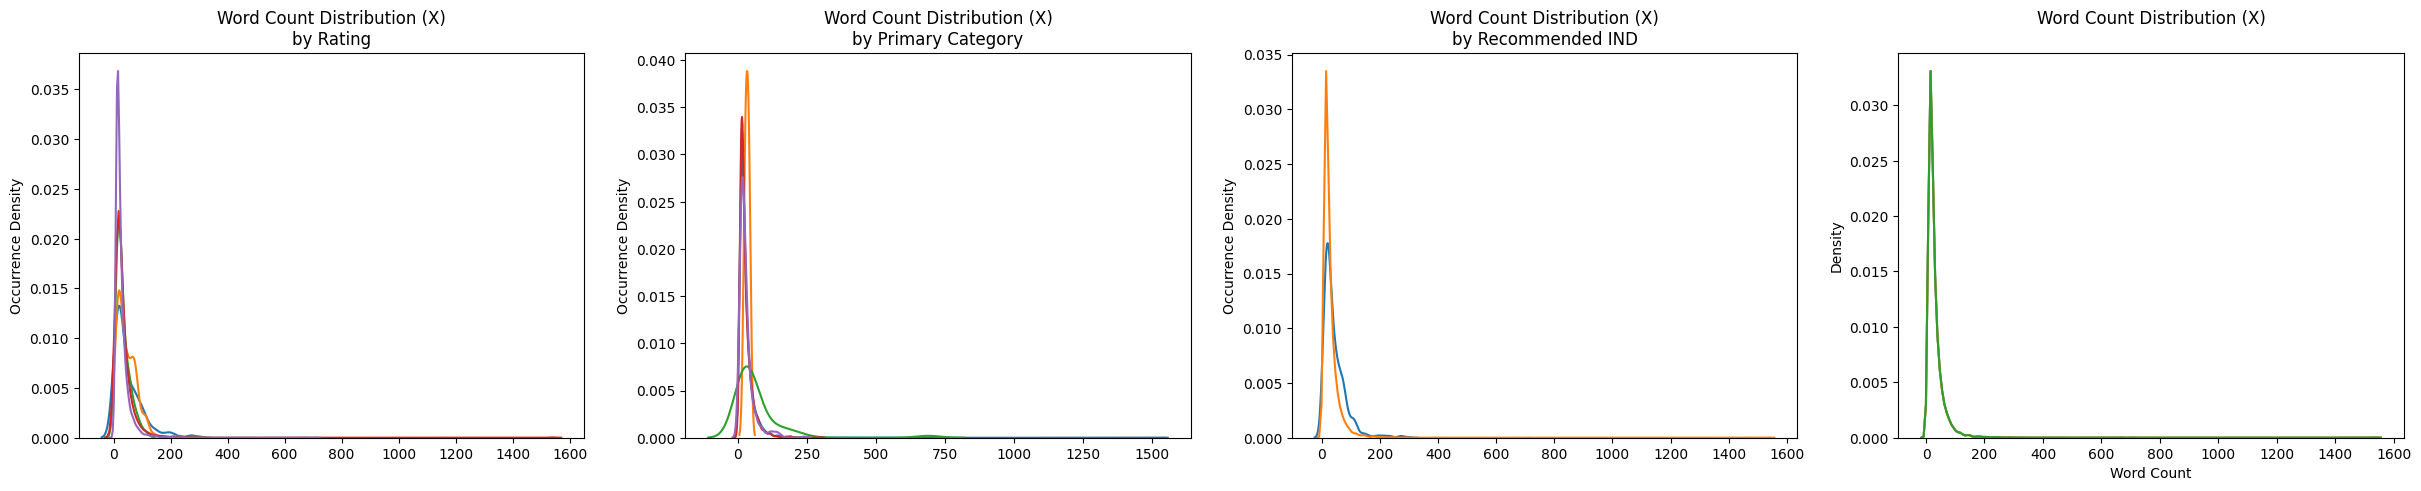


Total Word Count is: 489374


count    16086.000000
mean        30.422355
std         39.808293
min          1.000000
25%         14.000000
50%         20.000000
75%         35.000000
max       1539.000000
Name: Word Count, dtype: float64

In [13]:
f, axes = plt.subplots(1, 4, figsize=(30, 5), sharex=False)

for index, y in enumerate(['Rating', 'Primary Category', 'Recommended IND']):
    for x in set(df[y][df[y].notnull()]):
        sns.kdeplot(df['Word Count'][df[y]==x], label=x, fill=False, ax=axes[index])
        axes[index].set_title('{} Distribution (X)\nby {}'.format('Word Count', y))
    axes[index].set_ylabel('Occurrence Density')
    axes[index].set_xlabel('')
    
    # Plot 4
    axes[3].set_title('Word Count Distribution (X)\n')
    sns.kdeplot(df['Word Count'],fill=False,ax=axes[3])
    axes[index].set_xlabel("")
    #axes[3].legend_.remove()
plt.savefig('wordcountdist-rating-deptname-recommended.png', format='png', dpi=300)
plt.show()

print("\nTotal Word Count is: {}".format(df["Word Count"].sum()))
df['Word Count'].describe().T

## Categorical Variable by Categorical Variable

## Product Type by Primary Category

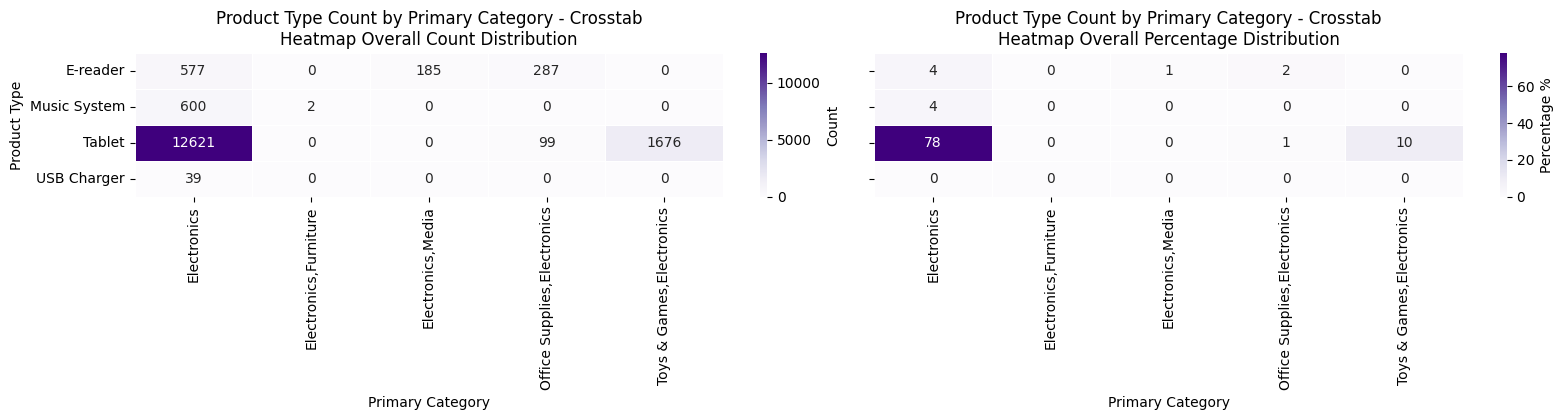

In [14]:
f, ax = plt.subplots(1, 2, figsize=(16, 4), sharey=True)
sns.heatmap(pd.crosstab(df['Product Type'], df['Primary Category']),
            annot=True, linewidths=.5, ax=ax[0], fmt='g', cmap='Purples',
            cbar_kws={'label': 'Count'})
ax[0].set_title('Product Type Count by Primary Category - Crosstab\nHeatmap Overall Count Distribution')

sns.heatmap(pd.crosstab(df['Product Type'], df['Primary Category'], normalize=True).mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap='Purples',
            cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Product Type Count by Primary Category - Crosstab\nHeatmap Overall Percentage Distribution')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.savefig('divname-deptname.png', format='png', dpi=300)
plt.show()

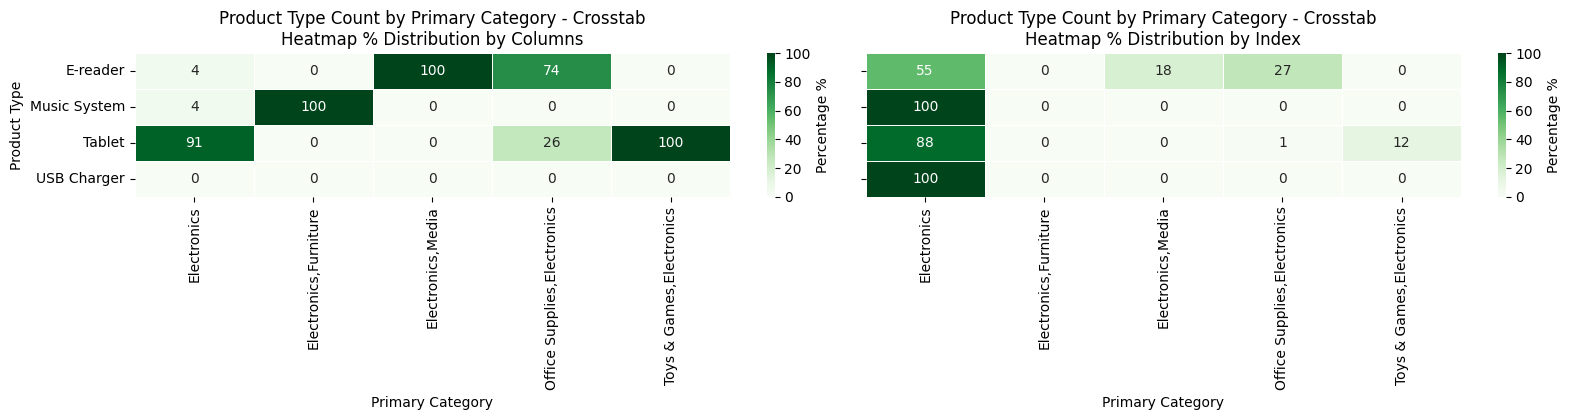

In [15]:
f, ax = plt.subplots(1, 2, figsize=(16, 4), sharey=True)
sns.heatmap(pd.crosstab(df['Product Type'], df['Primary Category'], normalize='columns').mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[0], fmt='g', cmap='Greens',
            cbar_kws={'label': 'Percentage %'})
ax[0].set_title('Product Type Count by Primary Category - Crosstab\nHeatmap % Distribution by Columns')

sns.heatmap(pd.crosstab(df['Product Type'], df['Primary Category'], normalize='index').mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap='Greens',
            cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Product Type Count by Primary Category - Crosstab\nHeatmap % Distribution by Index')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.savefig('divname-deptname-pivot.png', format='png', dpi=300)
plt.show()

## Percentage Standardize Distribution Plots

In [16]:
def percentstandardize_barplot(x, y, hue, data, ax=None, order=None):
    """
    Standardize by percentage the data using pandas functions, then plot using Seaborn.
    Function arguments are and extention of Seaborns'.
    """
    sns.barplot(x=x, y=y, hue=hue, ax=ax, order=order,
    data=(data[[x, hue]]
          .reset_index(drop=True)
          .groupby([x])[hue]
          .value_counts(normalize=True)
          .rename('Percentage').mul(100)
          .reset_index()
          .sort_values(hue)))
    plt.title('Percentage Frequency of {} by {}'.format(hue, x))
    plt.ylabel('Percentage %')

## Recommended IND by Department and Division

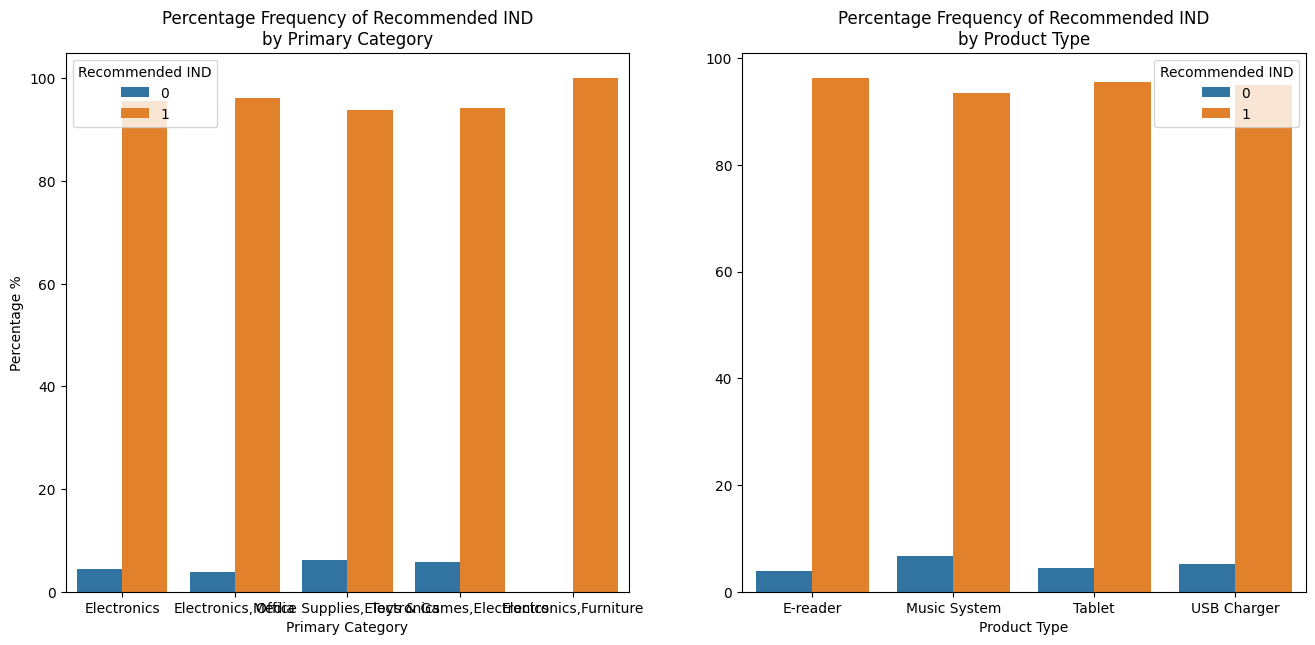

In [17]:
huevar = 'Recommended IND'
f, axes = plt.subplots(1, 2, figsize=(16, 7))
percentstandardize_barplot(x='Primary Category', y='Percentage', hue=huevar,data=df, ax=axes[0])
axes[0].set_title('Percentage Frequency of {}\nby Primary Category'.format(huevar))
axes[0].set_ylabel('Percentage %')
percentstandardize_barplot(x='Product Type', y='Percentage', hue=huevar, data=df, ax=axes[1])
axes[1].set_title('Percentage Frequency of {}\nby Product Type'.format(huevar))
axes[1].set_ylabel('')
plt.savefig('recommended-deptname-divname.png', format='png', dpi=300)
plt.show()

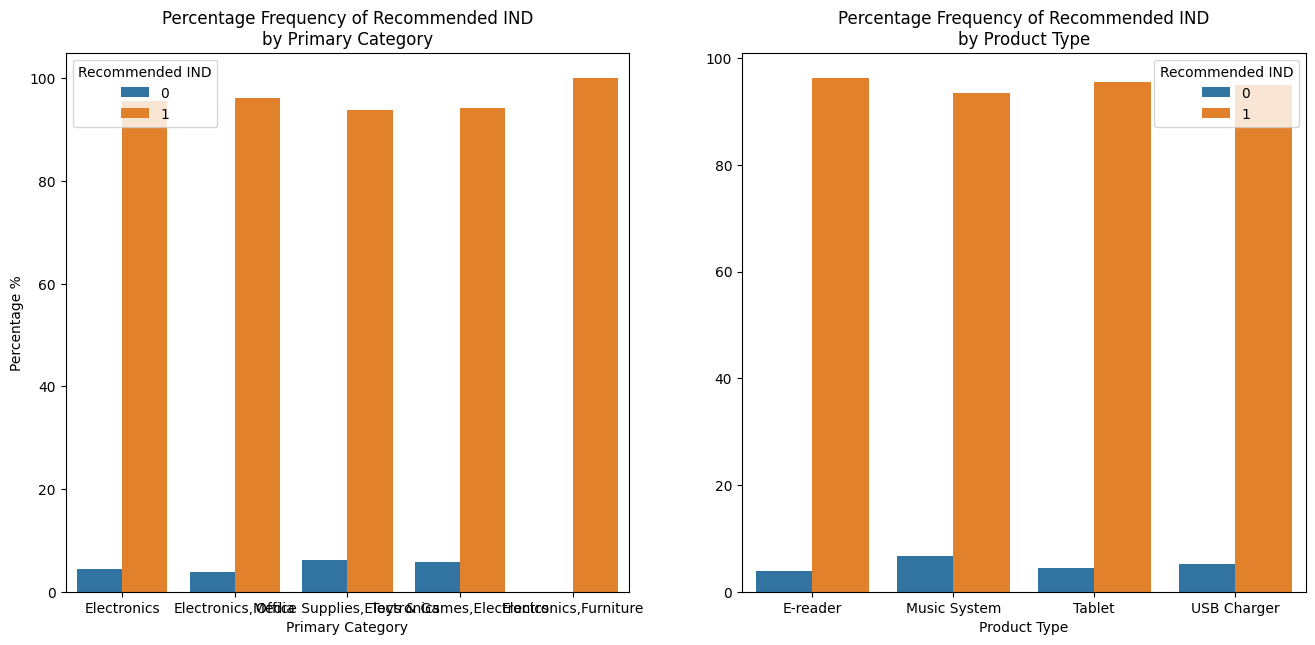

In [18]:
huevar = 'Recommended IND'
f, axes = plt.subplots(1, 2, figsize=(16, 7))
percentstandardize_barplot(x='Primary Category', y='Percentage', hue=huevar,data=df, ax=axes[0])
axes[0].set_title('Percentage Frequency of {}\nby Primary Category'.format(huevar))
axes[0].set_ylabel('Percentage %')
percentstandardize_barplot(x='Product Type', y='Percentage', hue=huevar, data=df, ax=axes[1])
axes[1].set_title('Percentage Frequency of {}\nby Product Type'.format(huevar))
axes[1].set_ylabel('')
plt.savefig('recommended-deptname-divname.png', format='png', dpi=300)
plt.show()

## Rating by Department and Product Type

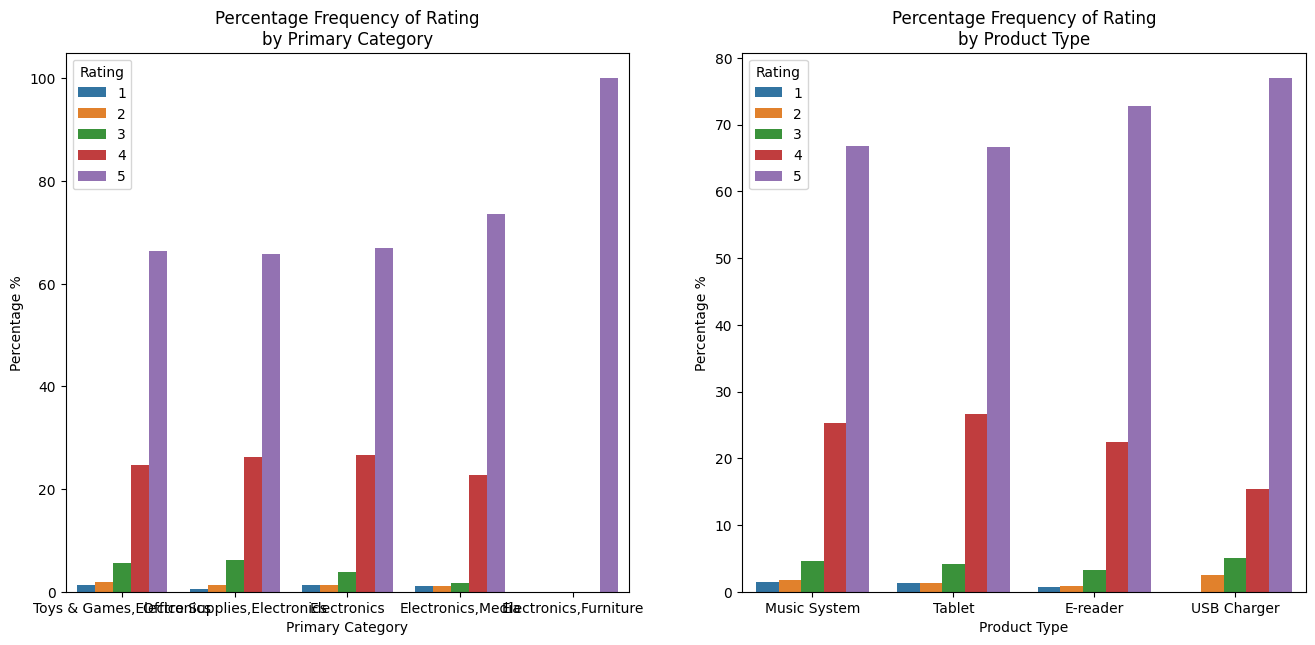

In [19]:
xvar = ['Primary Category', 'Product Type']
huevar = 'Rating'
f, axes = plt.subplots(1, 2, figsize=(16, 7))
percentstandardize_barplot(x=xvar[0], y='Percentage', hue=huevar, data=df, ax=axes[0])
axes[0].set_title('Percentage Frequency of {}\nby {}'.format(huevar, xvar[0]))
axes[0].set_ylabel('Percentage %')
percentstandardize_barplot(x=xvar[1], y='Percentage', hue=huevar, data=df, ax=axes[1])
axes[1].set_title("Percentage Frequency of {}\nby {}".format(huevar, xvar[1]))
plt.savefig('rating-deptname-divname.png', format='png', dpi=300)
plt.show()

## Rating by Recommended IND

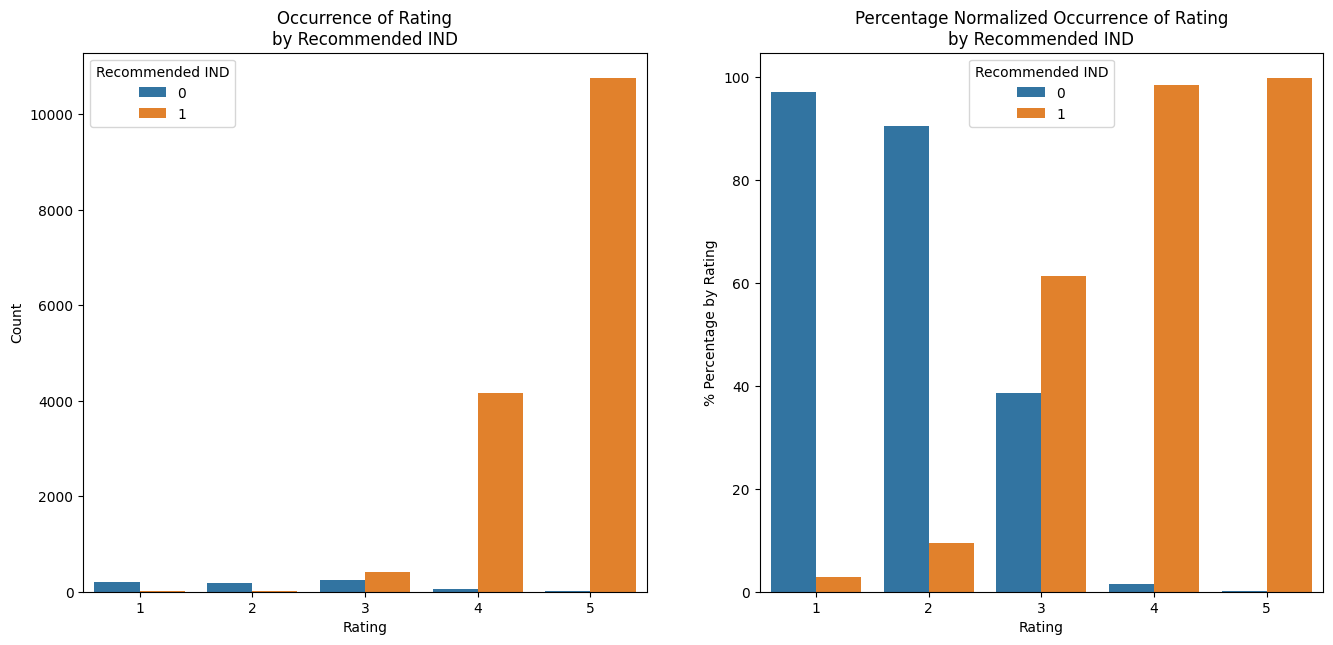

In [20]:
huevar = 'Rating'
f, axes = plt.subplots(1, 2, figsize=(16, 7))
sns.countplot(x='Rating', hue='Recommended IND', data=df, ax=axes[0])
axes[0].set_title('Occurrence of {}\nby {}'.format(huevar, 'Recommended IND'))
axes[0].set_ylabel('Count')
percentstandardize_barplot(x='Rating', y='Percentage', hue='Recommended IND', data=df, ax=axes[1])
axes[1].set_title('Percentage Normalized Occurrence of {}\nby {}'.format(huevar, 'Recommended IND'))
axes[1].set_ylabel('% Percentage by Rating')
plt.savefig('rating-recommended.png', format='png', dpi=300)
plt.show()

## Rating by Recommended IND

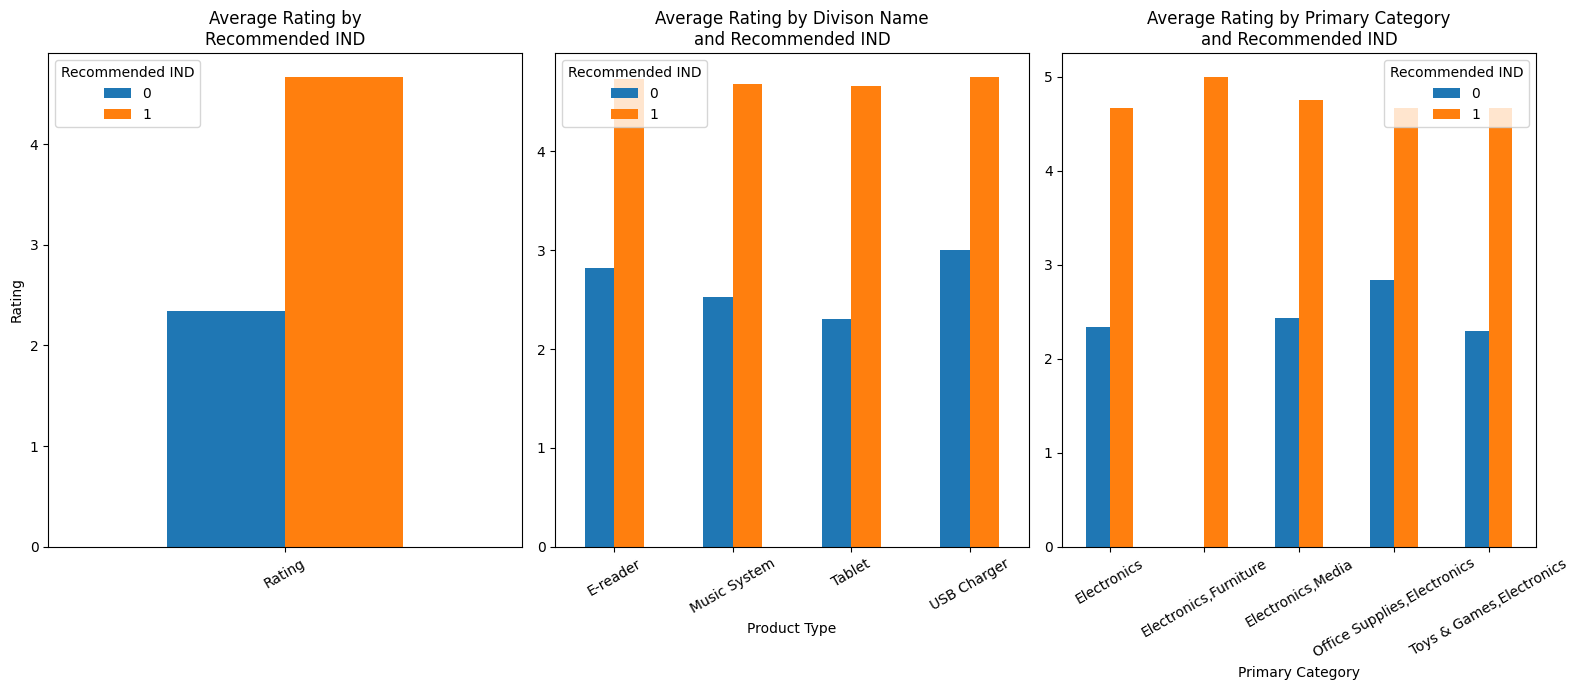

In [21]:
f, axes = plt.subplots(1, 3, figsize=(16, 7))
rot = 30
df.pivot_table('Rating',
               columns=['Recommended IND']).plot.bar(ax=axes[0], rot=rot)
axes[0].set_title('Average Rating by\nRecommended IND')
df.pivot_table('Rating', index='Product Type',
               columns=['Recommended IND']).plot.bar(ax=axes[1], rot=rot)
axes[1].set_title('Average Rating by Divison Name\nand Recommended IND')
df.pivot_table('Rating', index='Primary Category',
               columns=['Recommended IND']).plot.bar(ax=axes[2], rot=rot)
axes[0].set_ylabel('Rating')
axes[2].set_title('Average Rating by Primary Category\nand Recommended IND')
f.tight_layout()
plt.savefig('meanrating-deptname-recommended.png', format='png', dpi=300)
plt.show()

## Average Rating and Recommended IND by ID Correlation

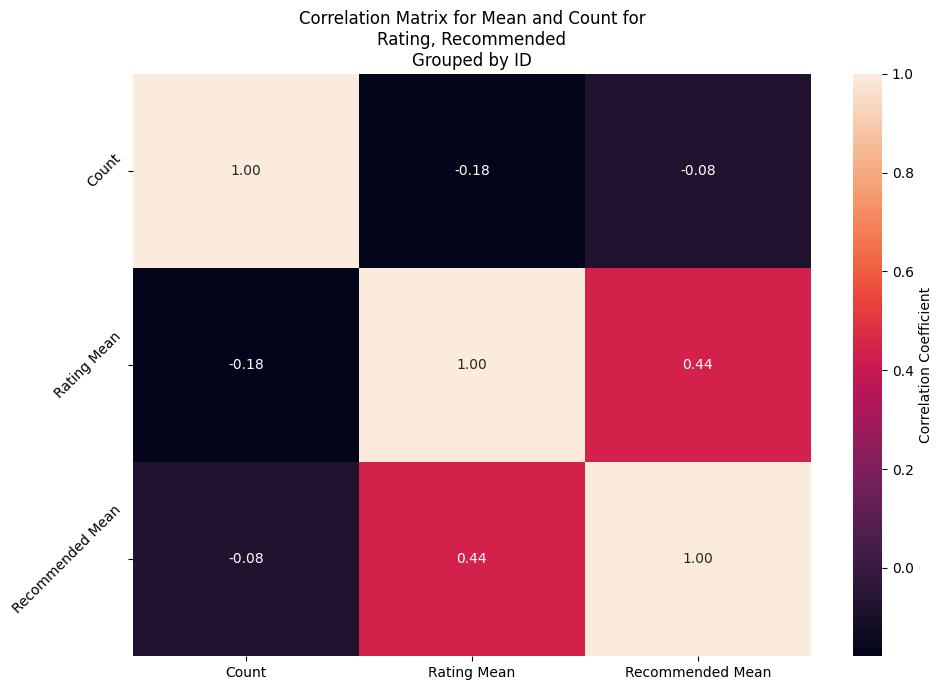

In [22]:
temp = (df.groupby('ID')[['Rating', 'Recommended IND']]
        .aggregate(['count', 'mean']))
temp.columns = ['Count', 'Rating Mean', 'Recommended IND Count',
                'Recommended Mean']
temp.drop(['Recommended IND Count'], axis=1, inplace=True)

# Plot Correlation Matrix
f, ax = plt.subplots(figsize=[10, 7])
ax = sns.heatmap(temp.corr(),
                 annot=True, fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
ax.set_title('Correlation Matrix for Mean and Count for\nRating, Recommended\nGrouped by ID')
plt.yticks(rotation=45)
plt.tight_layout()
plt.savefig('meanrating-recommended-clothing-corr.png', format='png', dpi=300)
plt.show()

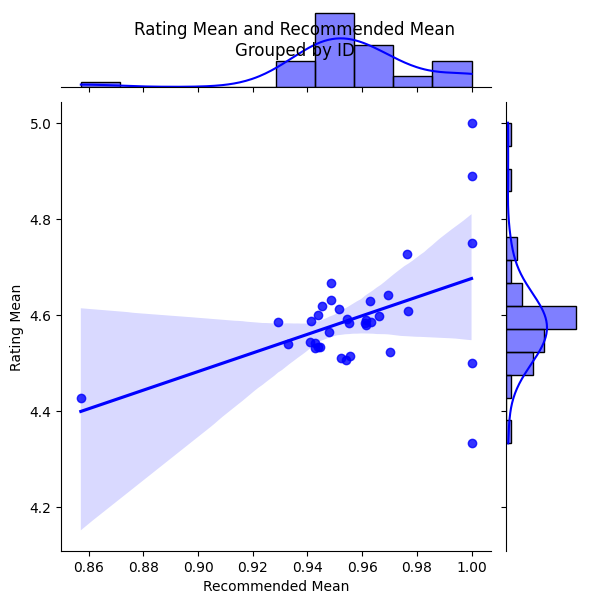

In [23]:
g = sns.jointplot(x='Recommended Mean', y='Rating Mean', data=temp,
                  kind='reg', color='b')
plt.subplots_adjust(top=0.999)
g.fig.suptitle('Rating Mean and Recommended Mean\nGrouped by ID')
plt.savefig('meanrating-recommended-clothing.png', format='png', dpi=300)
plt.show()

## Average Rating and Recommended IND by Category Correlation

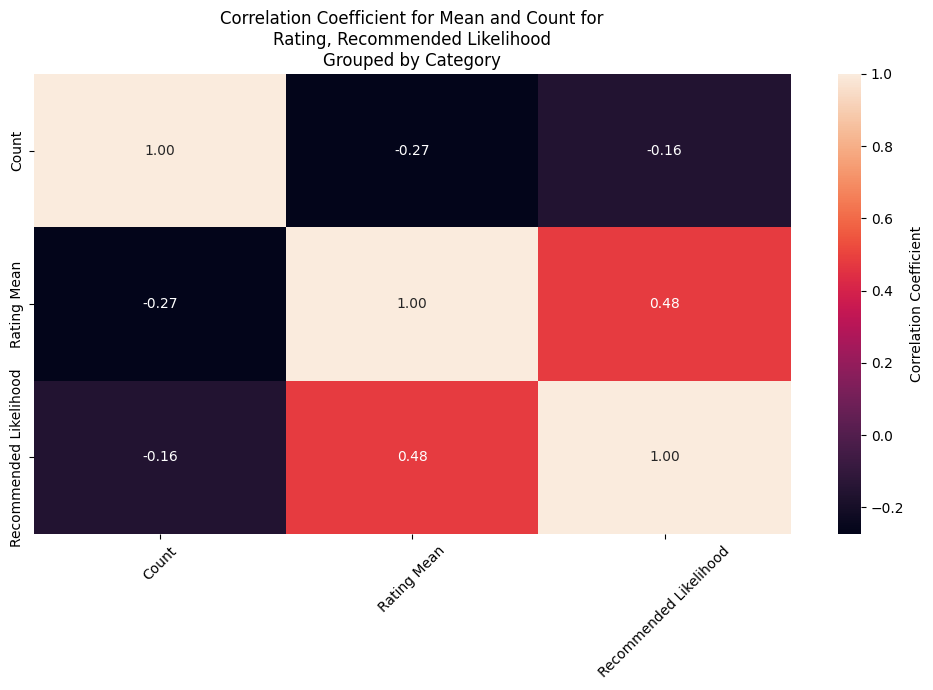

Class Categories:
 ['Computers & Accessories,Tablet & E-Reader Accessories,Amazon Devices & Accessories,Electronics,Power Adapters & Cables,Computers Features,Cell Phone Accessories,Cell Phone Batteries & Power,Digital Device Accessory,Tablet Accessories,Featured Brands,Kindle Fire (2nd Generation) Accessories,Kindle Store,Kindle Accessories,Power Adapters Cables,Electrical,Home,Tablets & E-Readers,Chargers Adapters,Chargers & Adapters,Electronics Features,Fire Tablet Accessories,Amazon Book Reader Accessory,Cell Phones,Amazon Device Accessories,Home Improvement,Fire (5th Generation) Accessories,Amazon Devices,Cables & Chargers'
 'Amazon Echo,Home Theater & Audio,MP3 MP4 Player Accessories,Smart Speakers,Electronics,Portable Audio,Compact Radios Stereos,Smart Hubs & Wireless Routers,Featured Brands,Smart Home & Connected Living,Home Security,Kindle Store,Electronic Components,Home Automation,Smart Speakers, Hubs & Accessories,Mobile Bluetooth Speakers,Home, Garage & Office,Amazon Tap,H

In [24]:
key = 'Category'
temp = (df.groupby(key)[['Rating', 'Recommended IND']]
        .aggregate(['count', 'mean']))
temp.columns = ['Count', 'Rating Mean', 'Recommended Likelihood Count',
                'Recommended Likelihood']
temp.drop(['Recommended Likelihood Count'], axis=1, inplace=True)

# Plot Correlation Matrix
f, ax = plt.subplots(figsize=[10, 7])
ax = sns.heatmap(temp.corr(),
                 annot=True, fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
ax.set_title('Correlation Coefficient for Mean and Count for\nRating, Recommended Likelihood\nGrouped by {}'.format(key))
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('meanrating-recommended-classname-corr.png', format='png', dpi=300)
plt.show()
print('Class Categories:\n',df['Category'].unique())

# Working with Text

In [25]:
pd.set_option('max_colwidth', 500)
df[["Title","Review Text", "Rating"]].sample(7)

Title  \
13023                Great product   
11453  Great item for a 2 year old   
4841           Kind of complicated   
14027                 Easy to use.   
5489                  Perfect gift   
10079                        Great   
2379       Even better than before   

                                                                                                                                                                                                                                                                                                                                  Review Text  \
13023                                                                                                                                                                                                                                 Easy to navigate. Daughter loves it. It's lightweigh and its just what she needed for this avid reader.   
11453                                                                                                                                                                                                                                                                              Great gift for the price. Brought for 2 year old grandson.   
4841   I bought 2 of these tablets for my two youngest children. They had a lot of options to chose from as far as children apps go, but they were already familiar with the iPad since they stole mine all the time. Lol. That made it hard for them as well as myself to figure out how to use at first. Besides that, it's a good product.   
14027                                                                                                                                                                                                                                                            Goo graphics and easy to use. Does much more than you think. A perfect gift.   
5489                                                                                                                                                                                                                                                                              My mom had been wanting one for a while, so this was great.   
10079                                                                                                                                                                                                                                                           Like how I was able to buy a version with more memory. Love this works great.   
2379                                                                                                                                                                                              I bought this to replace my wife's (1st generation) Kindle Fire. She likes it even better than the old one, especially the pinsharp screen.   

       Rating  
13023       5  
11453       5  
4841        3  
14027       5  
5489        5  
10079       5  
2379        5

## Text Cleaning

In [26]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer

ps = PorterStemmer()

tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ') #1
    words = tokenizer.tokenize(txt) #2
    words = [w for w in words if not w in stop_words] #3
    #words = [ps.stem(w) for w in words] #4
    return words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Sentiment Analysis

In [27]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Pre-Processing
SIA = SentimentIntensityAnalyzer()
df['Review Text']= df['Review Text'].astype(str)

# Applying Model, Variable Creation
df['Polarity Score'] = df['Review Text'].apply(lambda x: SIA.polarity_scores(x)['compound'])
df['Neutral Score'] = df['Review Text'].apply(lambda x: SIA.polarity_scores(x)['neu'])
df['Negative Score'] = df['Review Text'].apply(lambda x: SIA.polarity_scores(x)['neg'])
df['Positive Score'] = df['Review Text'].apply(lambda x: SIA.polarity_scores(x)['pos'])

# Converting 0 to 1 Decimal Score to a Categorical Variable
df['Sentiment'] = ''
df.loc[df['Polarity Score'] > 0, 'Sentiment'] = 'Positive'
df.loc[df['Polarity Score'] == 0, 'Sentiment'] = 'Neutral'
df.loc[df['Polarity Score'] < 0, 'Sentiment'] = 'Negative'

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Normalize Plots for Sentiment Distribution

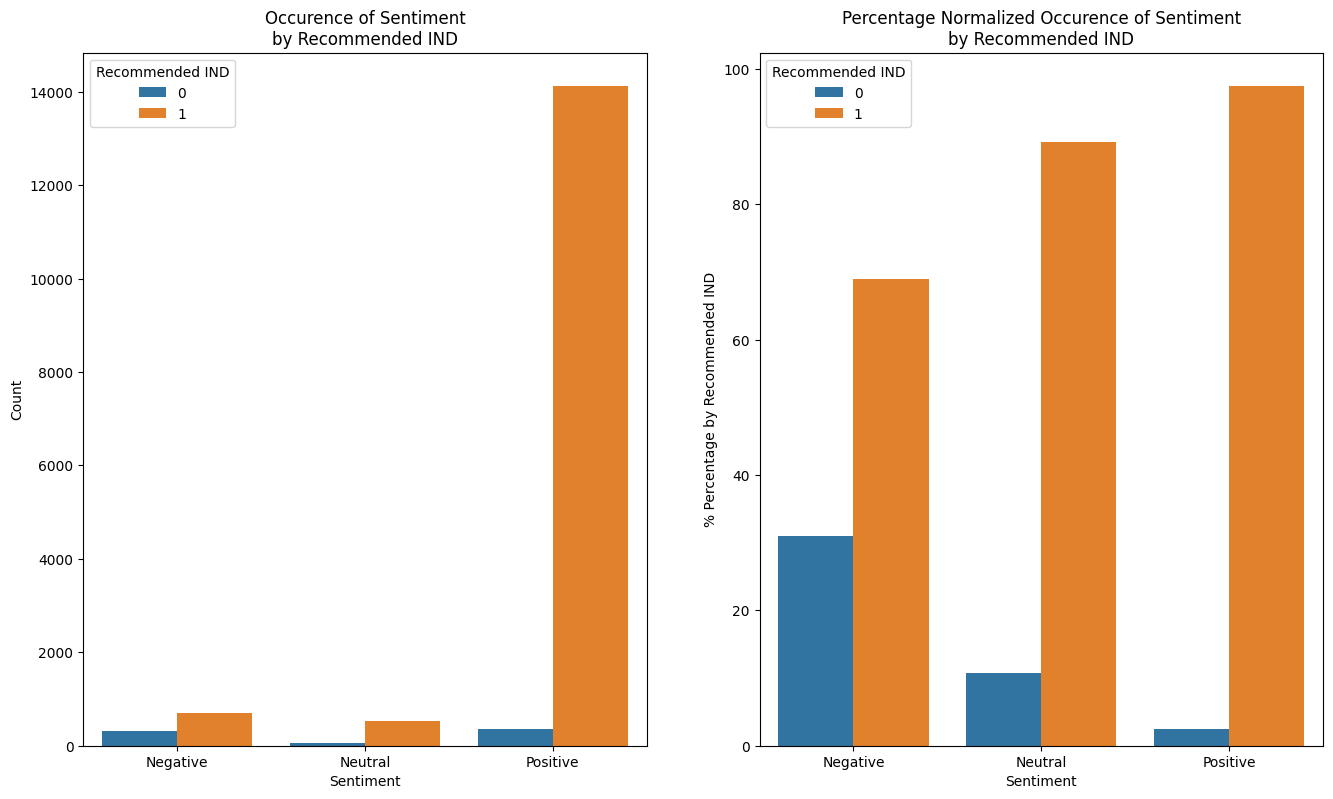

In [28]:
huevar = 'Recommended IND'
xvar = 'Sentiment'
f, axes = plt.subplots(1, 2, figsize=(16, 9))
sns.countplot(x=xvar, hue=huevar,data=df, ax=axes[0], order=['Negative', 'Neutral', 'Positive'])
axes[0].set_title('Occurence of {}\nby {}'.format(xvar, huevar))
axes[0].set_ylabel('Count')
percentstandardize_barplot(x=xvar, y='Percentage', hue=huevar, data=df, ax=axes[1])
axes[1].set_title('Percentage Normalized Occurence of {}\nby {}'.format(xvar, huevar))
axes[1].set_ylabel('% Percentage by {}'.format(huevar))
plt.savefig('norm-sentimentdist.png', format='png', dpi=300)
plt.show()

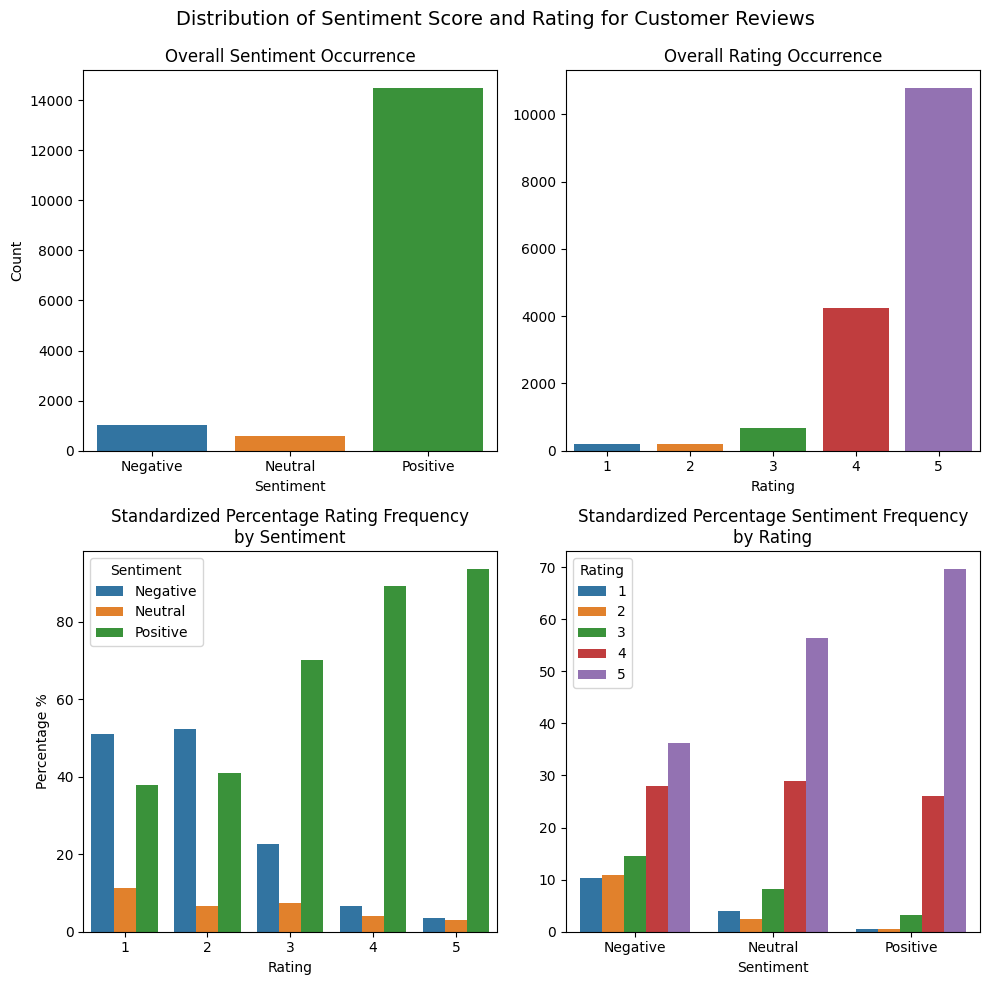

In [29]:
f, axes = plt.subplots(2, 2, figsize=[10, 10])
sns.countplot(x='Sentiment', data=df, ax=axes[0, 0], order=['Negative', 'Neutral', 'Positive'])
axes[0,0].set_xlabel('Sentiment')
axes[0,0].set_ylabel('Count')
axes[0,0].set_title('Overall Sentiment Occurrence')

sns.countplot(x='Rating', data=df, ax=axes[0, 1])
axes[0,1].set_xlabel('Rating')
axes[0,1].set_ylabel('')
axes[0,1].set_title('Overall Rating Occurrence')

percentstandardize_barplot(x='Rating', y='Percentage', hue='Sentiment', data=df, ax=axes[1, 0])
axes[1,0].set_xlabel('Rating')
axes[1,0].set_ylabel('Percentage %')
axes[1,0].set_title('Standardized Percentage Rating Frequency\nby Sentiment')

percentstandardize_barplot(x='Sentiment', y='Percentage',hue='Rating', data=df, ax=axes[1, 1])
axes[1,1].set_ylabel('Occurrence Frequency')
axes[1,1].set_title('Standardized Percentage Sentiment Frequency\nby Rating')
axes[1,1].set_xlabel('Sentiment')
axes[1,1].set_ylabel('')

f.suptitle('Distribution of Sentiment Score and Rating for Customer Reviews', fontsize=14)
f.tight_layout()
f.subplots_adjust(top=0.92)
plt.savefig('sentimentscoredist-rating.png', format='png', dpi=300)
plt.show()

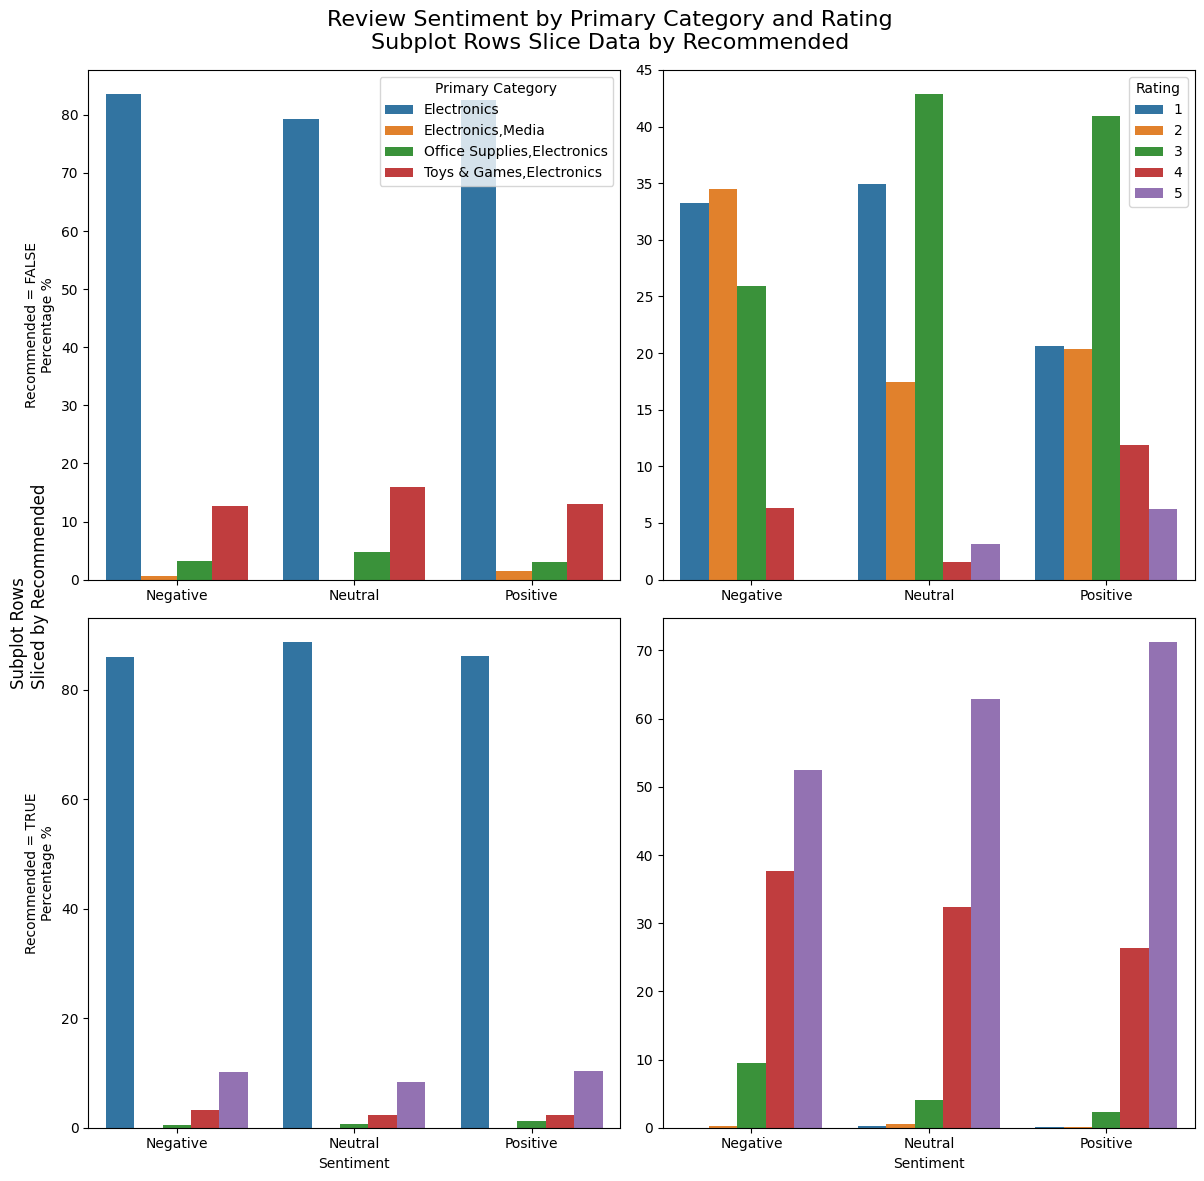

In [30]:
xvar = 'Sentiment'
huevar = 'Primary Category'
rowvar = 'Recommended IND'

# Plot
f, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=False, sharey=False)
for i,x in enumerate(set(df[rowvar][df[rowvar].notnull()])):
    percentstandardize_barplot(x=xvar, y='Percentage', hue=huevar, data=df[df[rowvar] == x],
                               ax=axes[i,0], order=['Negative','Neutral','Positive'])
    percentstandardize_barplot(x=xvar, y='Percentage', hue='Rating', data=df[df[rowvar] == x],
                               ax=axes[i,1], order=['Negative','Neutral','Positive'])

# Plot Aesthetics
axes[1,0].legend_.remove()
axes[1,1].legend_.remove()
axes[0,1].set_ylabel('')
axes[1,1].set_ylabel('')
axes[0,0].set_xlabel('')
axes[0,1].set_xlabel('')
axes[0,0].set_ylabel('Recommended = FALSE\nPercentage %')
axes[1,0].set_ylabel('Recommended = TRUE\nPercentage %')
axes[1,1].set_title('')

# Common title and ylabel
f.text(0.0, 0.5, 'Subplot Rows\nSliced by Recommended', va='center', rotation='vertical', fontsize=12)
f.suptitle('Review Sentiment by Primary Category and Rating\nSubplot Rows Slice Data by Recommended', fontsize=16)
f.tight_layout()
f.subplots_adjust(top=0.93)
plt.savefig('sentiment-deptname-rating-recommended.png', format='png', dpi=300)
plt.show()

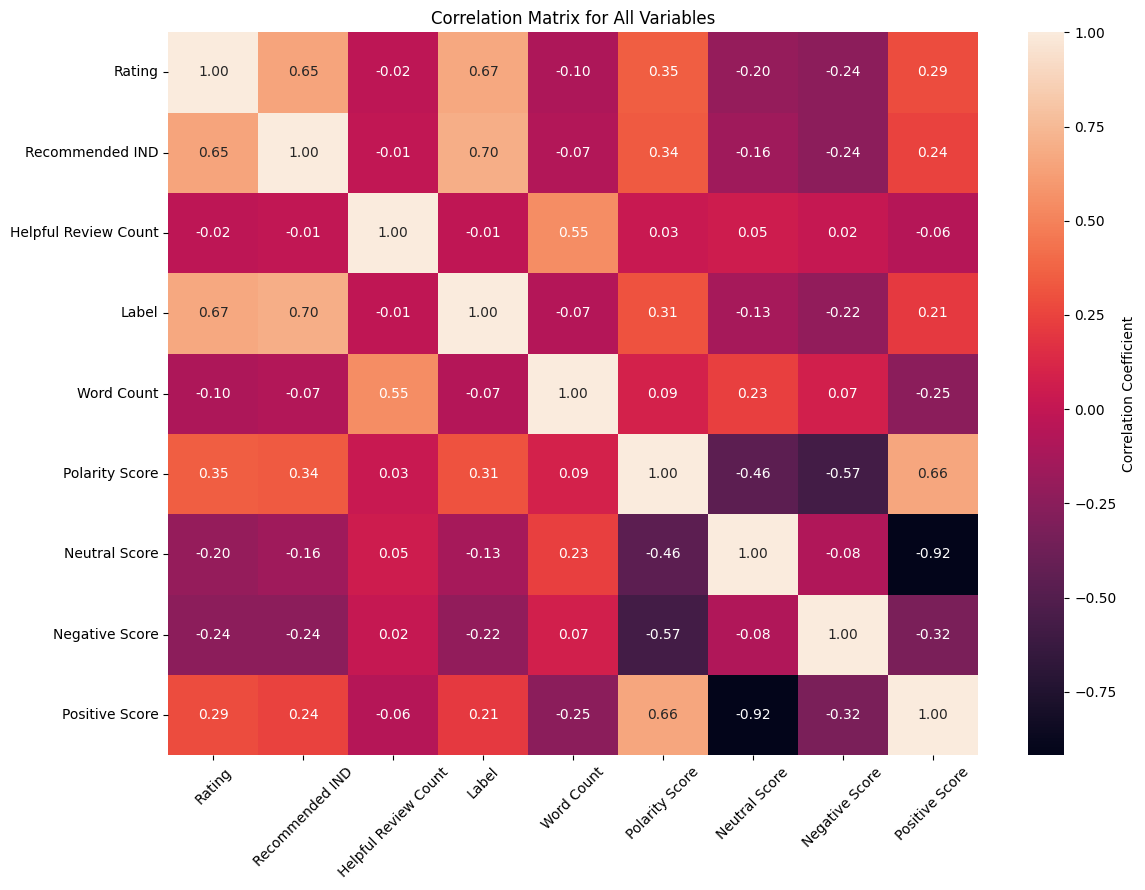

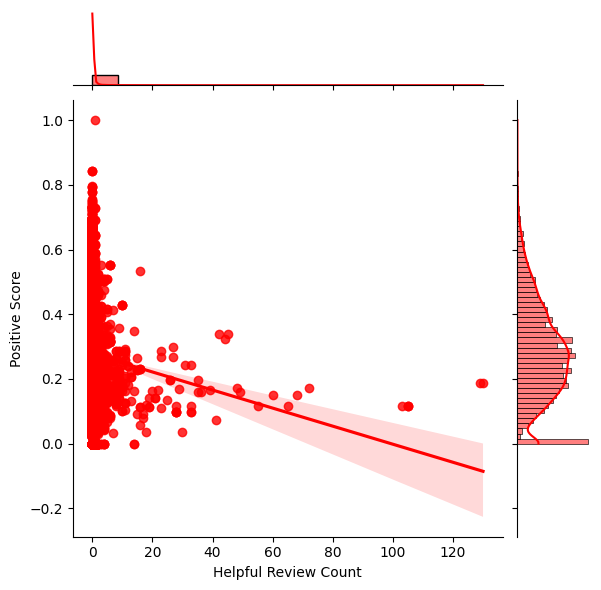

In [31]:
f, ax = plt.subplots(figsize=[12, 9])
ax = sns.heatmap(df.corr(), annot=True,
                 fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
ax.set_title('Correlation Matrix for All Variables')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('corr-all.png', format='png', dpi=300)
plt.show()

# Sentiment Positivity Score by Helpful Review Count
ax = sns.jointplot(x= df['Helpful Review Count'], y=df['Positive Score'], kind='reg', color='r')
plt.savefig('positivesentiment-positivefeedback.png', format='png', dpi=300)
plt.show()

# Word Distribution and Word Cloud

In [32]:
import matplotlib as mpl

stopwords = set(STOPWORDS)
size = (20, 10)

def cloud(text, title, stopwords=stopwords, size=size):
    mpl.rcParams['figure.figsize'] = (10.0, 10.0)
    mpl.rcParams['font.size'] = 12
    mpl.rcParams['savefig.dpi'] = 300
    mpl.rcParams['figure.subplot.bottom'] = .1
    
    wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords=stopwords).generate(str(text))
    
    fig = plt.figure(figsize=size, facecolor='k')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=50, color='y')
    plt.tight_layout()
    plt.savefig('{}.png'.format(title), format='png', dpi=300)
    plt.show()
    
def wordfreqviz(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                        columns=['Word', 'Frequency']).set_index('Word')
    mpl.style.use('ggplot')
    rslt.plot.bar(rot=0)
    
def wordfreq(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rlst = pd.DataFrame(word_dist.most_common(top_N),
                        columns=['Word', 'Frequency']).set_index('Word')
    return rlst

## Visualize Titles

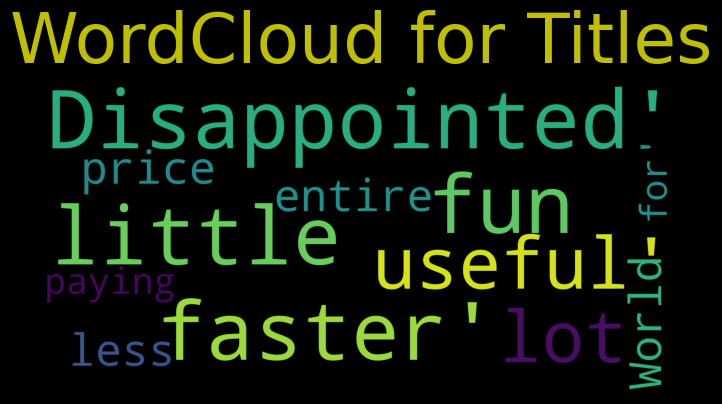

In [33]:
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df['Category'][df['Category'].notnull()].unique())]
                + ['dress', 'petite'])

# Cloud
cloud(text=df.Title[df.Title.notnull()].astype(str).values,
      title='WordCloud for Titles',
      stopwords=new_stop,
      size = (7,4))

## Visualize Reviews

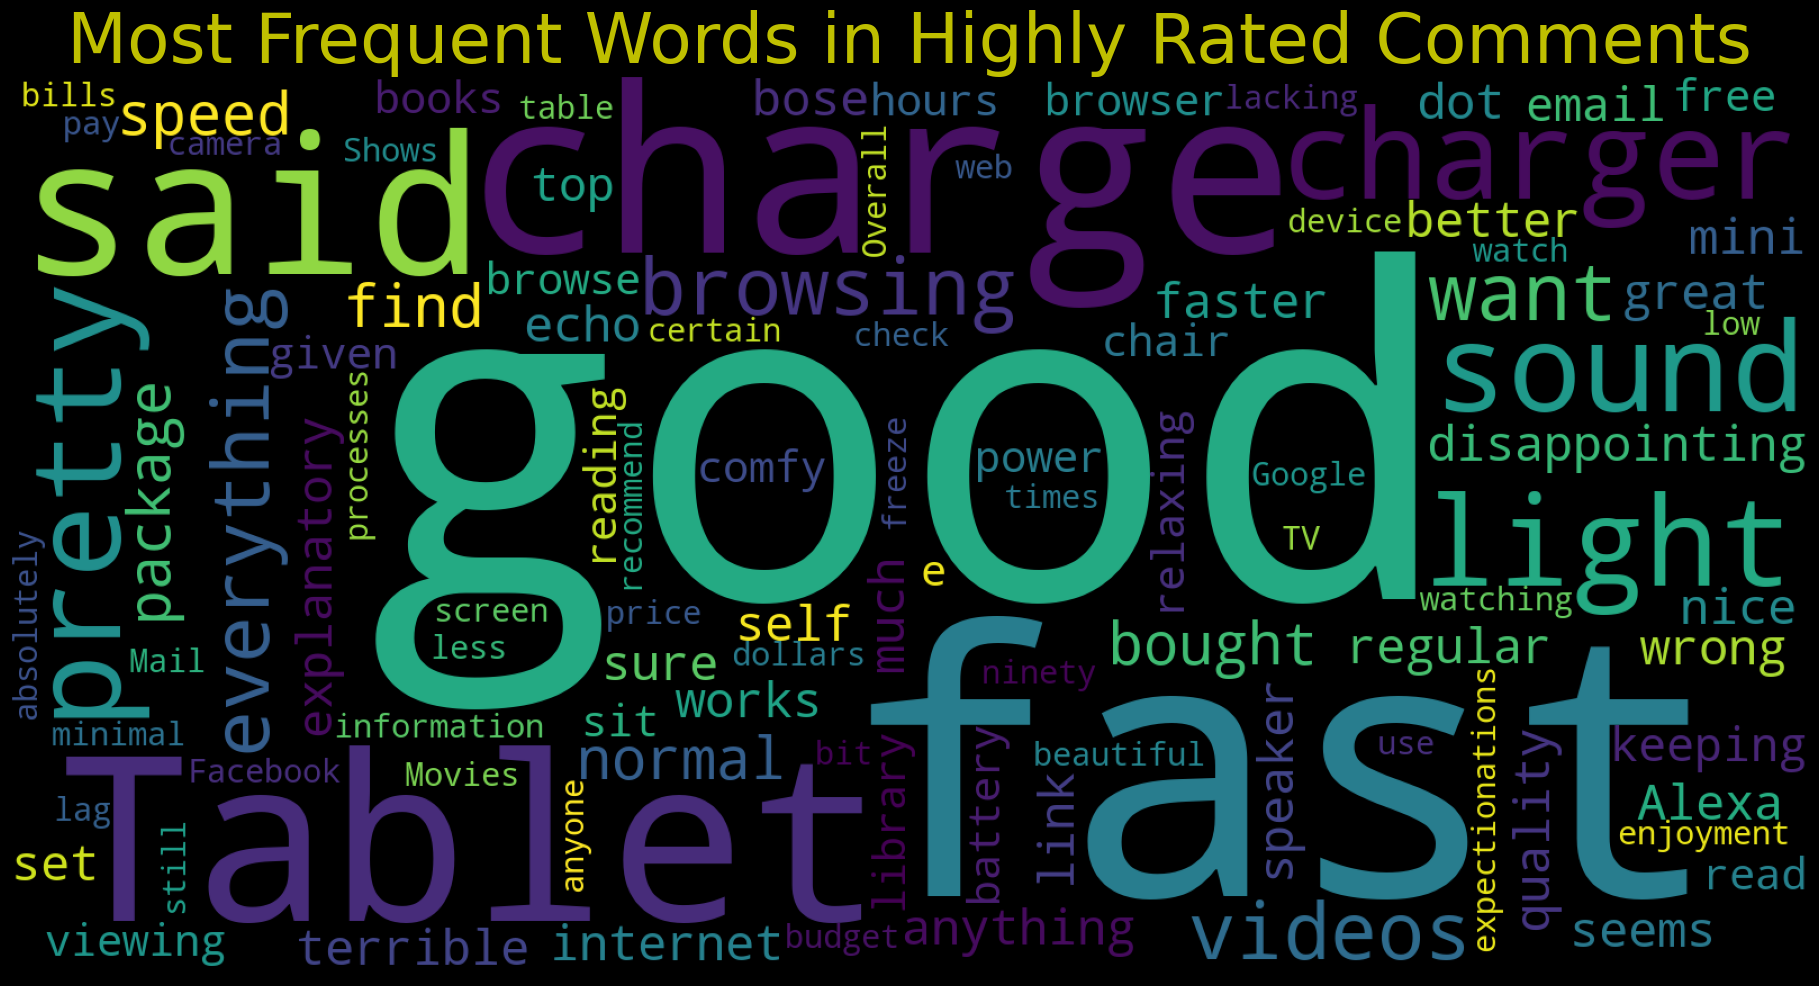

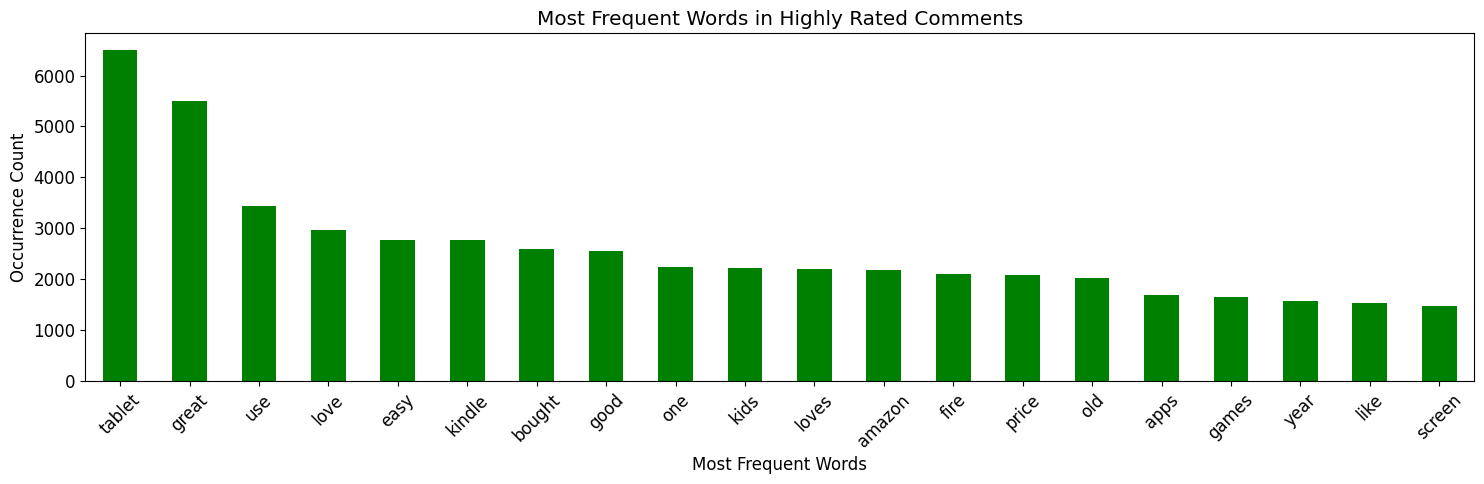

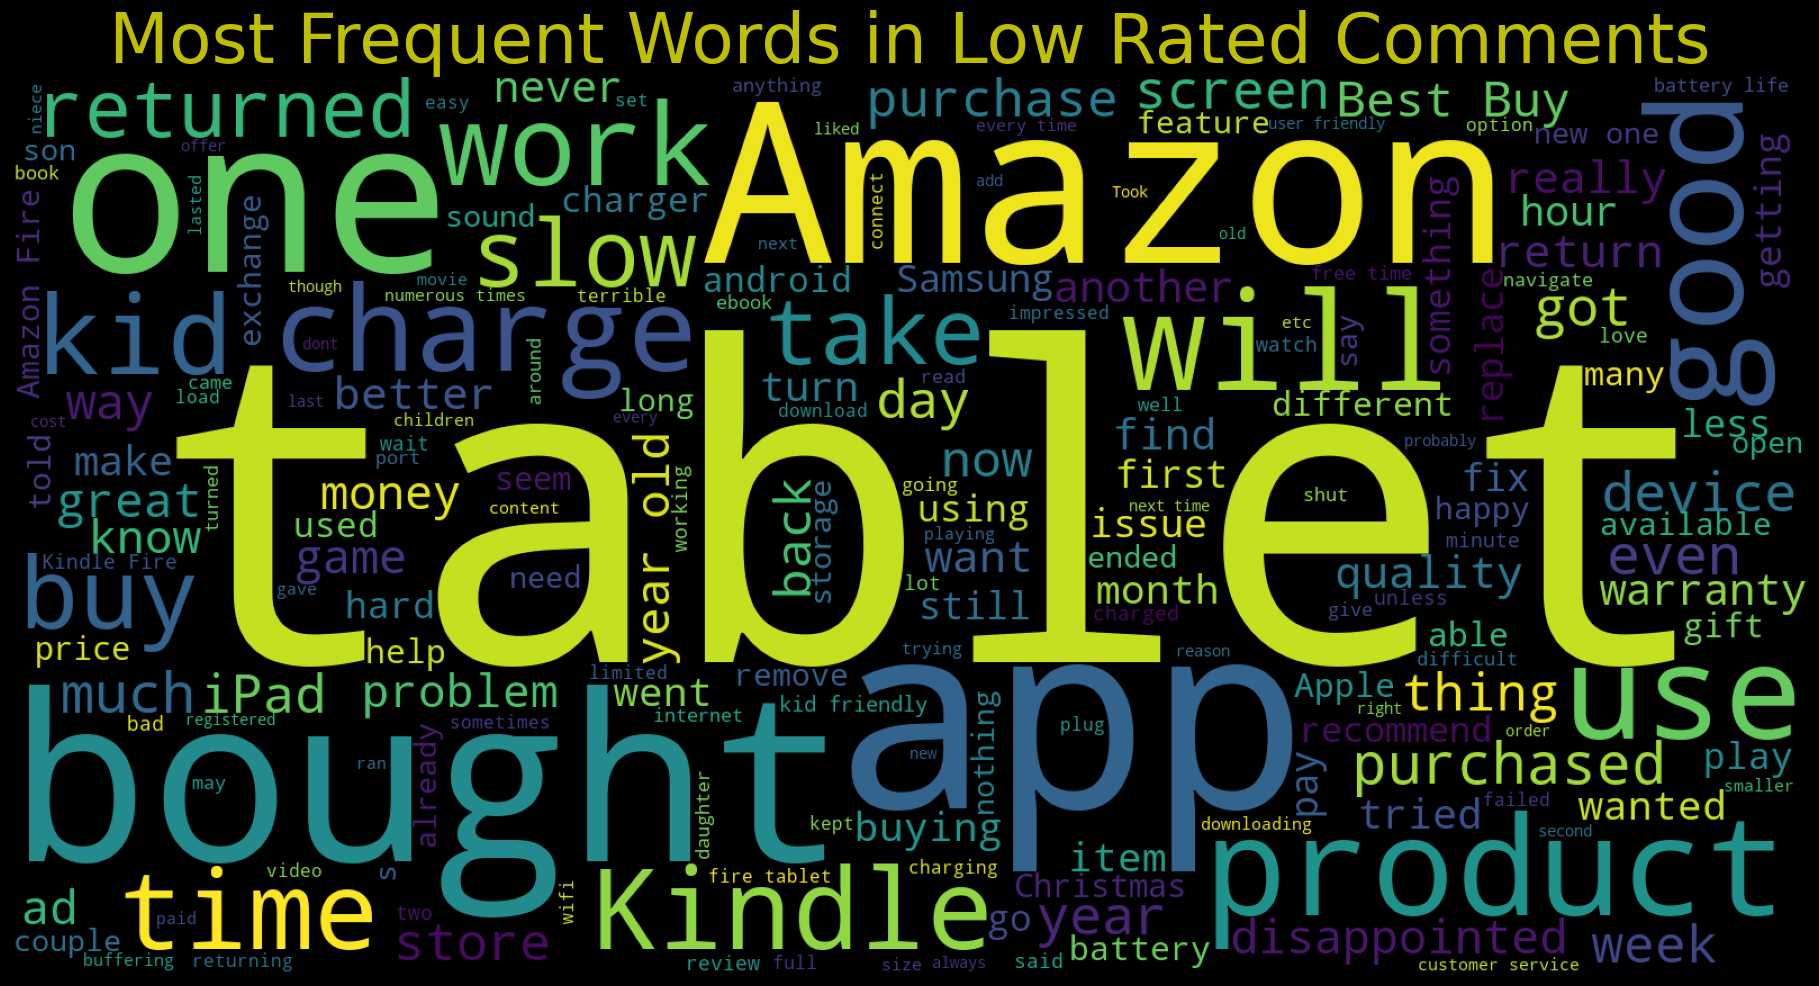

In [34]:
title ='Most Frequent Words in Highly Rated Comments'
temp = df['Review Text'][df.Rating.astype(int) >= 3]

# Modify Stopwords to Exclude Class types, suchs as 'dress'
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df['Category'][df['Category'].notnull()].unique())]
                + ['dress', 'petite'])

# Cloud
cloud(text= temp.values, title=title,stopwords= new_stop)

# Bar Chart
wordfreq(preprocessing(temp), 20).plot.bar(rot=45, legend=False, figsize=(15, 5), color='g',
                                          title=title)
plt.ylabel('Occurrence Count')
plt.xlabel('Most Frequent Words')
plt.tight_layout()
plt.savefig('most-freq-words-high-rate-comments.png', format='png', dpi=300)
plt.show()

# Low Raited
title ='Most Frequent Words in Low Rated Comments'
temp = df['Review Text'][df.Rating.astype(int) < 3]

# Modify Stopwords to Exclude Class types, suchs as 'dress'
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df['Category'][df['Category'].notnull()].unique())]
                + ['dress', 'petite', 'skirt', 'shirt'])

# Cloud
cloud(temp.values, title=title, stopwords=new_stop)

## WordClouds by Primary Category

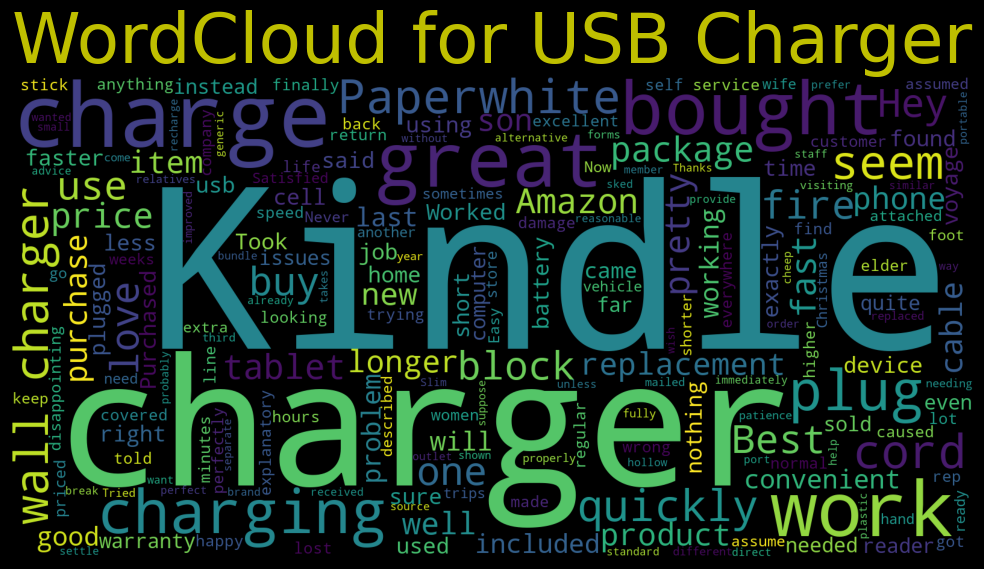

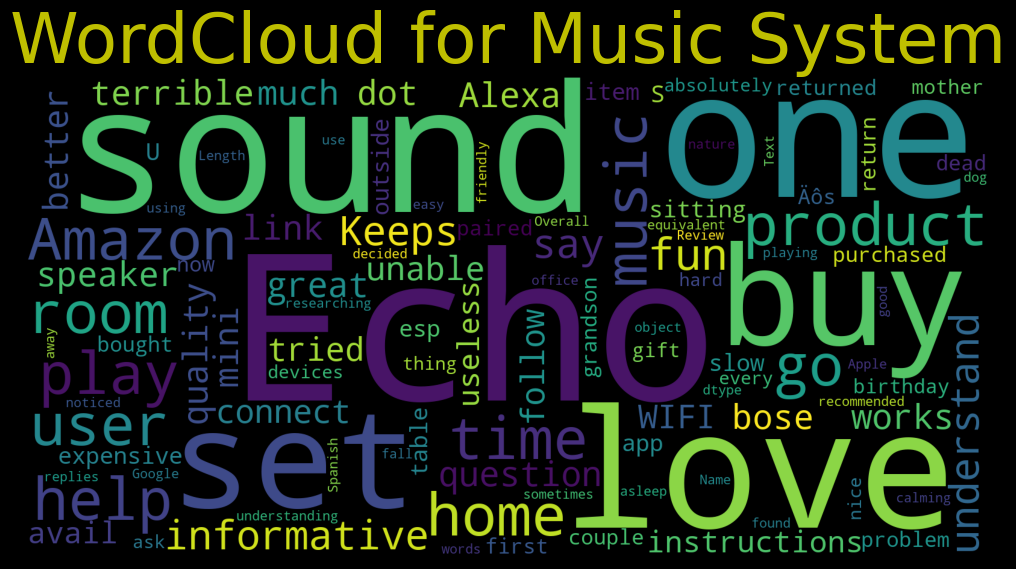

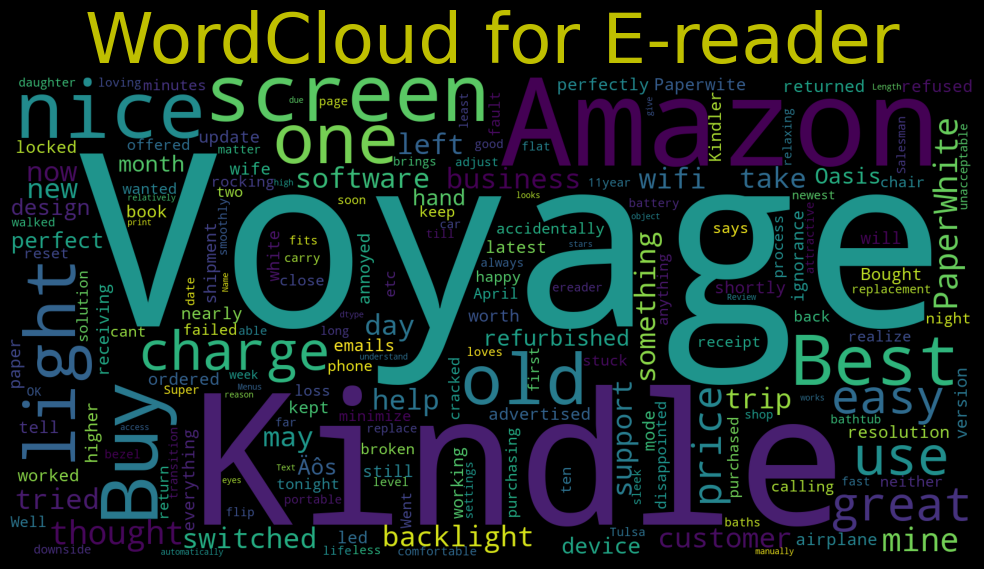

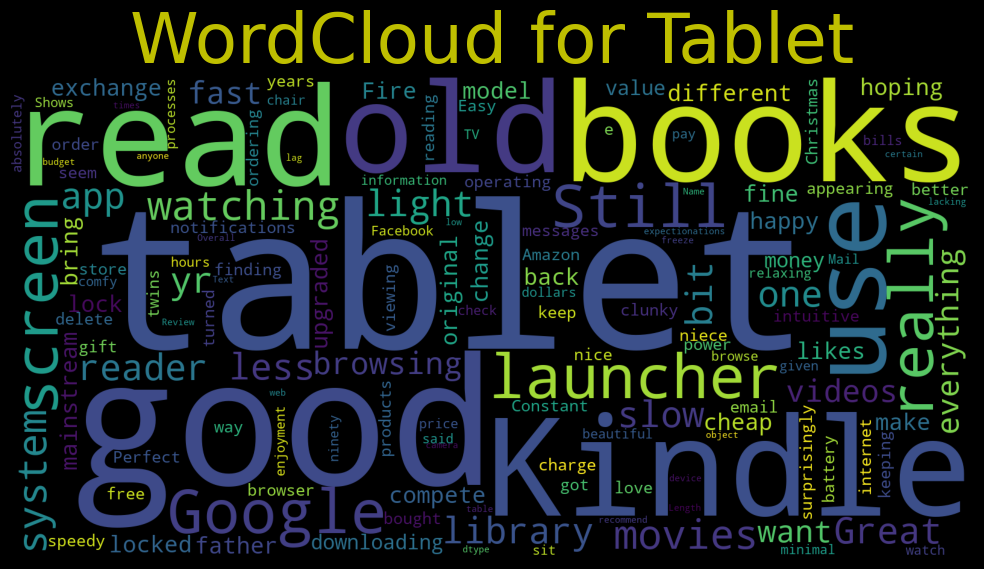

In [35]:
department_set = df['Primary Category'][df['Primary Category'].notnull()].unique()
division_set = df['Product Type'][df['Product Type'].notnull()].unique()
def cloud_by_category(data, category, subclass):
    """Function to create a wordcloud by class and subclass
    Category signifies the column variable
    Subclass refers to the specific value within the categorical variable"""
    new_stop = set(STOPWORDS)
    new_stop.update([x.lower() for x in list(data['Category'][data['Category'].notnull()].unique())]
                   + [x.lower() for x in list(data['Primary Category'][data['Primary Category'].notnull()].unique())]
                   + ['dress', 'petite', 'jacket', 'top'])

    # Cloud
    cloud(text= data['Review Text'][data[category]== subclass],
          title='WordCloud for {}'.format(subclass),
          stopwords= new_stop,
          size = (10,6))
    
# Plot
cloud_by_category(df, 'Product Type', division_set[0])
cloud_by_category(df, 'Product Type', division_set[1])
cloud_by_category(df, 'Product Type', division_set[2])
cloud_by_category(df, 'Product Type', division_set[3])


# Supervised Learning

## Recommended IND Classification

In [36]:
reviews = df['Review Text'].astype(str).str.lower()

In [37]:
type(reviews)

pandas.core.series.Series

In [38]:
features = reviews.tolist()

In [39]:
'''features'''

'features'

In [40]:
import re
from string import punctuation

In [41]:
for index in range(len(features)):
    all_text = ''.join([character for character in features[index] if character not in punctuation])
    features[index] = re.split(r'\n|\r', all_text)
    features[index] = ' '.join([word for word in features[index]])

In [42]:
'''features'''

'features'

In [43]:
labels = np.array(df['Recommended IND'], int)

In [44]:
labels.shape

(16086,)

In [45]:
labels[labels == 1].shape[0]

15353

In [46]:
labels[labels == 0].shape[0]

733

In [47]:
from keras.utils import to_categorical

In [48]:
labels = to_categorical(labels)

In [49]:
labels[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [50]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [51]:
t = Tokenizer()
t.fit_on_texts(features)
vocabulary_size = len(t.word_index) + 1

In [52]:
print('Vocabulary size : {}'.format(vocabulary_size))

Vocabulary size : 8719


In [53]:
encoded_features = t.texts_to_sequences(features)

max_length = 300

padded_features = pad_sequences(encoded_features, maxlen=max_length, padding='post')

In [54]:
embeddings_index = dict()
with open('glove.840B.300d.txt',encoding="utf8") as file:
    data = file.readlines()
    
# store <key, value> pair of FastText vectors
for line in data[1:]:
    word, vec = line.split(' ', 1)
    embeddings_index[word] = np.array([float(index) for index in vec.split()], dtype='float32')
print('Loaded {} word vectors.'.format(len(embeddings_index)))


embedding_matrix = np.zeros((vocabulary_size, max_length))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

Loaded 2196015 word vectors.


In [55]:
words = []
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        words.append(word)

In [56]:
print('{} words covered.'.format(len(words)))

7231 words covered.


In [57]:
percentage = (len(words) / vocabulary_size) * 100.00
print('{}% of {} words were covered'.format(percentage, vocabulary_size))

82.93382268608785% of 8719 words were covered


In [58]:
def train_test_split(features, labels, **kwargs):
    
    # concatenate the features and labels array
    dataset = np.c_[features, labels]

    # shuffle the dataset
    np.random.shuffle(dataset)

    # split the dataset into features, labels
    features, labels = dataset[:, 0:max_length], dataset[:, max_length:]

    # get the split size for training dataset
    split_index = int(kwargs['train_size'] * len(features))

    # split the dataset into training/validation dataset
    train_features, validation_features = features[:split_index], features[split_index:]
    train_labels, validation_labels = labels[:split_index], labels[split_index:]

    # get the split size for validation dataset
    split_index = int(kwargs['validation_size'] * len(validation_features))

    # split the validation dataset into validation/testing dataset
    validation_features, test_features = validation_features[:split_index], validation_features[split_index:]
    validation_labels, test_labels = validation_labels[:split_index], validation_labels[split_index:]

    # return the partitioned dataset
    return [train_features, train_labels], [validation_features, validation_labels], [test_features, test_labels]

In [59]:
train_dataset, validation_dataset, test_dataset = train_test_split(features=padded_features, labels=labels,
                                                                   train_size=0.60, validation_size=0.50)

In [60]:
print('Dataset size : {}'.format(padded_features.shape[0]))
print('Train dataset size : {}'.format(train_dataset[0].shape[0]))
print('Validation dataset size : {}'.format(validation_dataset[0].shape[0]))
print('Test dataset size : {}'.format(test_dataset[0].shape[0]))

Dataset size : 16086
Train dataset size : 9651
Validation dataset size : 3217
Test dataset size : 3218


In [61]:
from keras import callbacks
from keras.layers import Bidirectional
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import LSTM
from keras.models import Sequential
from sklearn.model_selection import StratifiedKFold

In [62]:
model = Sequential()
e = Embedding(vocabulary_size, max_length,
              weights=[embedding_matrix], input_length=max_length, trainable=False)
model.add(e)
model.add(Bidirectional(LSTM(256)))
model.add(Dropout(0.50))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_dataset[0], train_dataset[1], epochs=10, batch_size=256, verbose=1,
          validation_data=(validation_dataset[0], validation_dataset[1]))

score = model.evaluate(test_dataset[0], test_dataset[1], verbose=1)

print('loss : {}, acc : {}'.format(score[0], score[1]))

Epoch 1/10
38/38 [==============================] - 387s 10s/step - loss: 0.2206 - accuracy: 0.9380 - val_loss: 0.1814 - val_accuracy: 0.9549
Epoch 2/10
38/38 [==============================] - 500s 13s/step - loss: 0.1779 - accuracy: 0.9550 - val_loss: 0.1741 - val_accuracy: 0.9549
Epoch 3/10
38/38 [==============================] - 737s 19s/step - loss: 0.1623 - accuracy: 0.9550 - val_loss: 0.1574 - val_accuracy: 0.9549
Epoch 4/10
38/38 [==============================] - 907s 24s/step - loss: 0.1410 - accuracy: 0.9550 - val_loss: 0.1407 - val_accuracy: 0.9549
Epoch 5/10
38/38 [==============================] - 1021s 27s/step - loss: 0.1300 - accuracy: 0.9565 - val_loss: 0.1296 - val_accuracy: 0.9559
Epoch 6/10
38/38 [==============================] - 946s 25s/step - loss: 0.1188 - accuracy: 0.9575 - val_loss: 0.1236 - val_accuracy: 0.9587
Epoch 7/10
38/38 [==============================] - 920s 24s/step - loss: 0.1037 - accuracy: 0.9631 - val_loss: 0.1221 - val_accuracy: 0.9583
Epoch

In [63]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

test_predictions = model.predict(test_dataset[0])
test_predictions = np.argmax(test_predictions, axis=1)

class_names = ['(0) Not recommended class', '(1) Recommended class']
report = classification_report(np.argmax(test_dataset[1], axis=1), test_predictions, target_names=class_names)

101/101 [==============================] - 148s 689ms/step


In [64]:
print(report)

                           precision    recall  f1-score   support

(0) Not recommended class       0.60      0.51      0.55       154
    (1) Recommended class       0.98      0.98      0.98      3064

                 accuracy                           0.96      3218
                macro avg       0.79      0.75      0.77      3218
             weighted avg       0.96      0.96      0.96      3218



In [65]:
conf_matrix = confusion_matrix(np.argmax(test_dataset[1], axis=1), test_predictions)
print(conf_matrix)

[[  79   75]
 [  52 3012]]


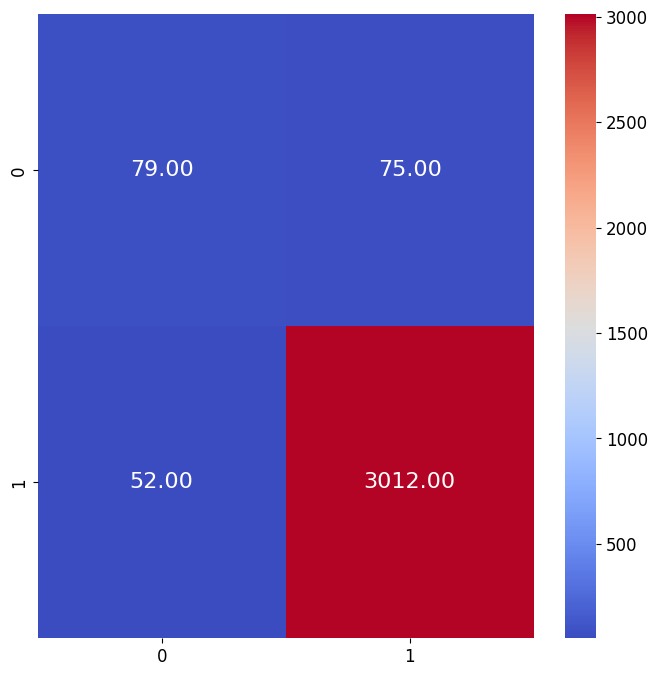

In [66]:
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, annot_kws={'size': 16}, cmap='coolwarm', fmt='.2f')
plt.savefig('conf_matrix_recommendation.png', format='png', dpi=300)

In [67]:
from sklearn.metrics import roc_auc_score

roc = roc_auc_score(y_score=test_predictions, y_true=np.argmax(test_dataset[1], 1))
print(roc)

0.7480078668068224


In [68]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(np.argmax(test_dataset[1], 1), test_predictions)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.7480078668068224


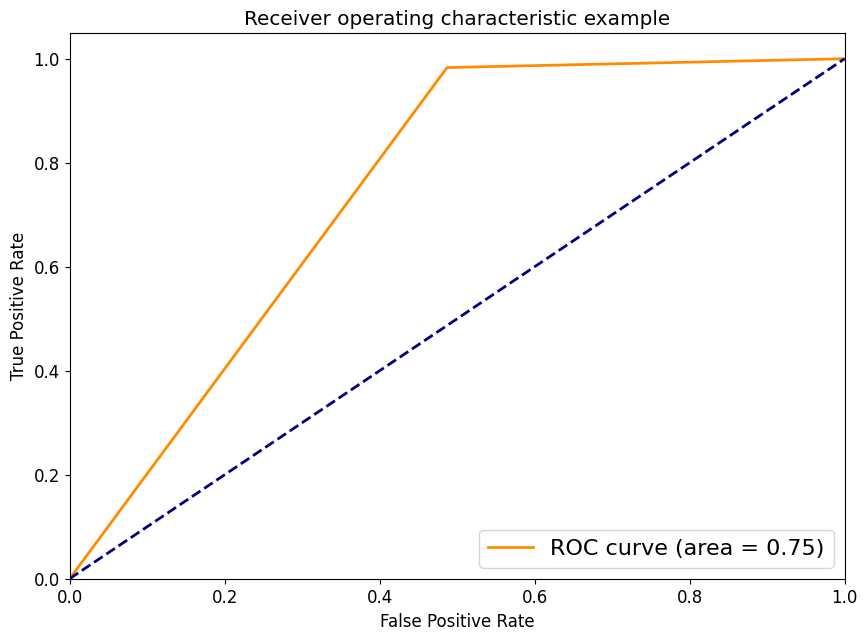

In [69]:
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, lw=2, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower right', fontsize=16)
plt.savefig('roc.png', format='png', dpi=300)
plt.show()

## Sentiment Classification

In [70]:
labels = np.array(df['Sentiment'])

In [71]:
labels

array(['Positive', 'Neutral', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [72]:
labels = np.array([2 if label == 'Positive' else (1 if label == 'Neutral' else 0) for label in labels],
                  int)

In [73]:
labels

array([2, 1, 2, ..., 2, 2, 2])

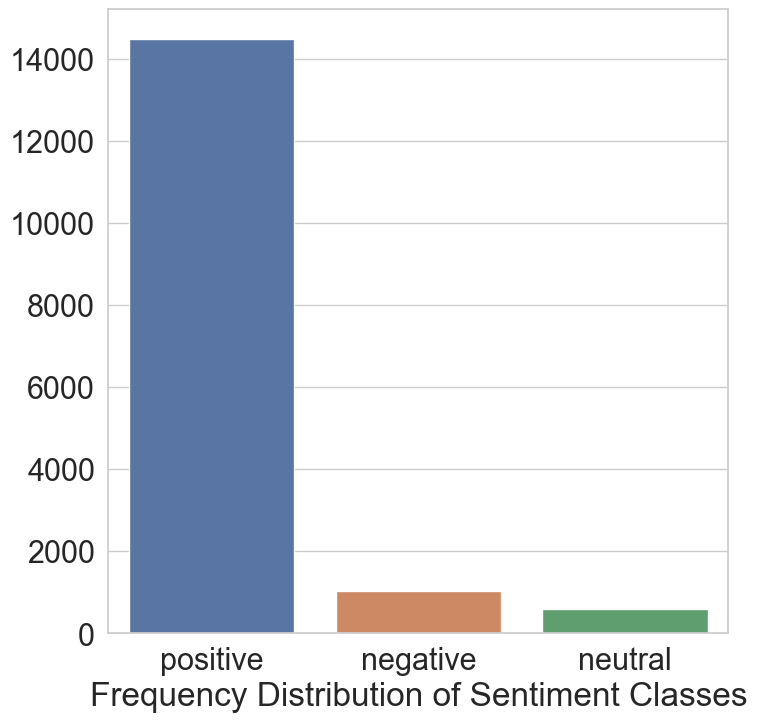

In [74]:
positive_class = int(labels[labels == 2].shape[0])
neutral_class = int(labels[labels == 1].shape[0])
negative_class = int(labels[labels == 0].shape[0])

df = pd.DataFrame.from_dict({'positive': [positive_class], 'negative': [negative_class], 'neutral': [neutral_class]})

plt.figure(figsize=(8, 8))
sns.set(font_scale=2)
sns.set_style('whitegrid')
ax = sns.barplot(data=df)
ax = ax.set_xlabel('Frequency Distribution of Sentiment Classes')

In [75]:
labels = to_categorical(labels)

In [76]:
train_dataset, validation_dataset, test_dataset = train_test_split(features=padded_features, labels=labels,
                                                                   train_size=0.60, validation_size=0.50)

In [77]:
model = Sequential()
e = Embedding(vocabulary_size, max_length,
              weights=[embedding_matrix], input_length=max_length, trainable=False)
model.add(e)
model.add(Bidirectional(LSTM(256), merge_mode='sum'))
model.add(Dropout(0.50))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_dataset[0], train_dataset[1], epochs=10, batch_size=256, verbose=1,
          validation_data=(validation_dataset[0], validation_dataset[1]))

score = model.evaluate(test_dataset[0], test_dataset[1], verbose=1)

print('loss : {}, acc : {}'.format(score[0], score[1]))

Epoch 1/10
38/38 [==============================] - 993s 26s/step - loss: 0.4199 - accuracy: 0.8767 - val_loss: 0.3277 - val_accuracy: 0.9086
Epoch 2/10
38/38 [==============================] - 728s 19s/step - loss: 0.3241 - accuracy: 0.8973 - val_loss: 0.2650 - val_accuracy: 0.9120
Epoch 3/10
38/38 [==============================] - 695s 18s/step - loss: 0.2592 - accuracy: 0.9053 - val_loss: 0.2566 - val_accuracy: 0.9186
Epoch 4/10
38/38 [==============================] - 705s 19s/step - loss: 0.2440 - accuracy: 0.9114 - val_loss: 0.2247 - val_accuracy: 0.9176
Epoch 5/10
38/38 [==============================] - 705s 19s/step - loss: 0.2169 - accuracy: 0.9221 - val_loss: 0.2068 - val_accuracy: 0.9207
Epoch 6/10
38/38 [==============================] - 658s 17s/step - loss: 0.1903 - accuracy: 0.9328 - val_loss: 0.1902 - val_accuracy: 0.9322
Epoch 7/10
38/38 [==============================] - 743s 20s/step - loss: 0.1611 - accuracy: 0.9401 - val_loss: 0.2100 - val_accuracy: 0.9282
Epoch 

In [78]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

test_predictions = model.predict(test_dataset[0])
test_predictions = np.argmax(test_predictions, axis=1)

class_names = ['(0) Negative class', '(1) Neutral class', '(2) Positive class']
report = classification_report(np.argmax(test_dataset[1], axis=1), test_predictions, target_names=class_names)

101/101 [==============================] - 79s 777ms/step


In [79]:
print(report)

                    precision    recall  f1-score   support

(0) Negative class       0.66      0.61      0.63       204
 (1) Neutral class       0.76      0.73      0.75       115
(2) Positive class       0.97      0.97      0.97      2899

          accuracy                           0.94      3218
         macro avg       0.80      0.77      0.78      3218
      weighted avg       0.94      0.94      0.94      3218



In [80]:
conf_matrix = confusion_matrix(np.argmax(test_dataset[1], axis=1), test_predictions)
print(conf_matrix)

[[ 125   11   68]
 [   7   84   24]
 [  58   15 2826]]


<AxesSubplot:>

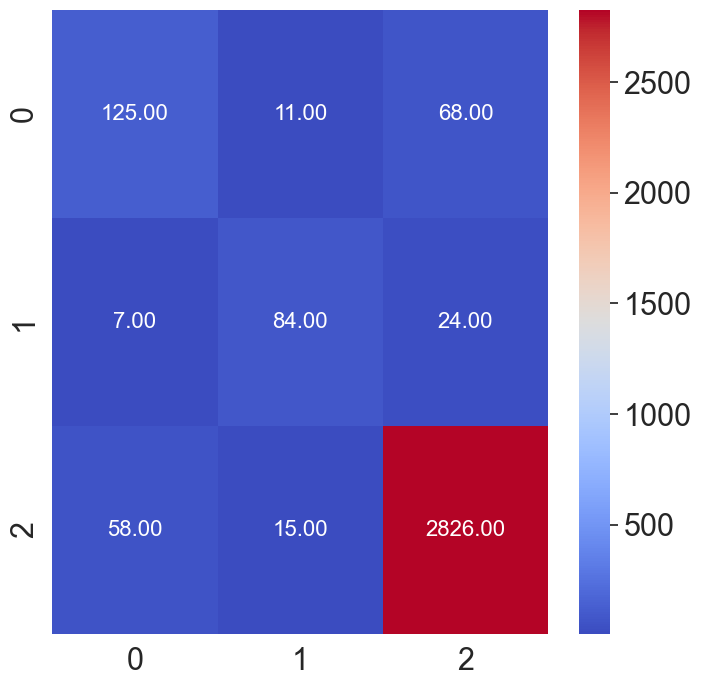

In [81]:
plt.figure(figsize=(8, 8))
plt.savefig('conf_matrix_sentiment.png', format='png', dpi=300)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size': 16}, cmap='coolwarm', fmt='.2f')